In [1]:
from moduleTest import ModuleTest
import numpy as np
import pandas as pd
from ics.cobraCharmer import pfi as pfiControl
from ics.cobraCharmer import pfiDesign
import moduleAnalyze
import visDianosticPlot
import os
from importlib import reload 
import matplotlib.pyplot as plt
import pathlib

2020-01-29 14:52:10.432Z matplotlib       10 __init__.py:271 $HOME=/home/pfs
2020-01-29 14:52:10.432Z matplotlib       10 __init__.py:271 CONFIGDIR=/home/pfs/.config/matplotlib
2020-01-29 14:52:10.433Z matplotlib       10 __init__.py:271 matplotlib data path: /home/pfs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data
2020-01-29 14:52:10.435Z matplotlib       10 __init__.py:997 loaded rc file /home/pfs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
2020-01-29 14:52:10.437Z matplotlib       10 __init__.py:1634 matplotlib version 3.1.0
2020-01-29 14:52:10.437Z matplotlib       10 __init__.py:1635 interactive is False
2020-01-29 14:52:10.438Z matplotlib       10 __init__.py:1636 platform is linux
2020-01-29 14:52:10.438Z matplotlib       10 __init__.py:1637 loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs'

2020-01-29 14:52:10.522Z matplotlib       10 __init__.py:271 CACHEDIR=/home/pfs/.cache/matplotlib
2020-01-29 14:52:10.524Z matplotlib.font_manager 10 font_manager.py:1352 Using fontManager instance from /home/pfs/.cache/matplotlib/fontlist-v310.json
2020-01-29 14:52:10.583Z matplotlib.pyplot 10 pyplot.py:219 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-01-29 14:52:10.718Z matplotlib.pyplot 10 pyplot.py:219 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [ ]:
moduleNameLong = 'Science32'
moduleNameShort = 'SC32'

In [ ]:
xml = pathlib.Path('/home/pfs/mhs/devel/pfs_instdata/data/pfi/modules/SC32/SC32_thetaFinal.xml')

In [ ]:
brokens = []
mt = ModuleTest('fpga', xml, brokens=brokens)
mt._connect()

In [ ]:
mt.convertXML(f'/data/{moduleNameShort}/{moduleNameLong}_converted.xml')

In [ ]:
del(mt)

In [ ]:

xml = pathlib.Path(f'/data/{moduleNameShort}/{moduleNameLong}_converted.xml')

brokens = []
mt = ModuleTest('fpga', xml, brokens=brokens)
mt._connect()

In [ ]:
runDir = mt.makePhiMotorMap(f'{moduleNameShort}_phi_250.xml', steps=250, repeat=3, totalSteps=6000)

In [ ]:
broken=[]
path=f'{runDir}/data/'
vis = visDianosticPlot.VisDianosticPlot(path, brokens=broken, camSplit=28)
vis.visPlotGeometry(arm='phi')

In [ ]:
vis.visPlotFiberDot(arm='phi')

In [ ]:
del(mt)

# Phi on-time optimize

In [ ]:
import ontimeOptimize
import pathlib


brokens=[]
arm='phi'
xml =pathlib.Path(f'{runDir}/output/SC32_phi_250.xml')
ontimeOptimize.exploreModuleOntime(brokens=brokens,
            arm=arm, iteration=4, XML=xml)

# Phi Motor Map

In [ ]:
xml = pathlib.Path('/data/MCS/20200108_003/output/phi_250step.xml')
broken=[]

mt = ModuleTest('fpga', xml, brokens=broken)
mt._connect()

In [ ]:
runDir=mt.makePhiMotorMap('SC18_phi_250.xml', steps=250, repeat=5, totalSteps=6000, fromHome=True)

In [ ]:
runDir =pathlib.Path('/data/MCS/20200129_005')
brokens=[]
vis = visDianosticPlot.VisDianosticPlot(f'{runDir}/data/', brokens=brokens, camSplit=28)
vis.visCobraMotorMap(stepsize=250, figPath=f'{runDir}/output/', arm='phi',
                     pdffile=f'{runDir}/output/phi_mm_250step.pdf',debug=True)

# Phi Target Convergence

In [ ]:
xml = pathlib.Path('/data/MCS/20200129_005/output/phi_250step.xml')
broken=[]

mt = ModuleTest('fpga', xml, brokens=broken)
mt._connect()
mt.setPhiGeometryFromRun(pathlib.Path('/data/MCS/20200129_005'), onlyIfClear=False)
#for scale in [1.2, 2.0, 3.0, 5.0, 8.0]:
mt.phiConvergenceTest(margin=15.0, runs=16, tries=8, 
                        fast=False, finalAngle=None, scaleFactor=2.0, tolerance=0.1)

In [ ]:
#/data/MCS/20191206_0[29,30,31,32,33]

broken=[]
for i in [29,30,31,32,33]:
    path=f'/data/MCS/20191206_0{i}'
    print(path)
    vis = visDianosticPlot.VisDianosticPlot(f'{path}/data/', brokens=broken, camSplit=28)
    vis.visConverge(figPath=f'{path}/output/',runs = 16,
                    arm='phi',pdffile= f'{path}/output/converge_phi.pdf')

2020-02-04 23:01:14.693Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3794776438>
2020-02-04 23:01:14.693Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:14.694Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3794776438>
2020-02-04 23:01:14.694Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:14.698Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
/home/pfs/mhs/devel/ics_cobraCharmer/procedures/moduleTest/visDianosticPlot.py:522: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  if montage is not None:
2020-02-04 23:01:14.768Z matplotlib.figure 10 figure.py:2411 Executing constra

2020-02-04 23:01:16.079Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:16.079Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3784e19518>
2020-02-04 23:01:16.079Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:16.084Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:16.152Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:16.194Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37844be160>
2020-02-04 23:01:16.194Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:16.195Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37844be160>
2020-02-04 23:01:16.195Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:16.200Z 

2020-02-04 23:01:17.666Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37875c7518>
2020-02-04 23:01:17.666Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:17.670Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:17.739Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:17.781Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37c6e25048>
2020-02-04 23:01:17.782Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:17.782Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37c6e25048>
2020-02-04 23:01:17.782Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:17.786Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:17.855Z matplotlib.figu

2020-02-04 23:01:19.233Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:19.234Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3785dd7c88>
2020-02-04 23:01:19.234Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:19.236Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:19.305Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:19.346Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3786c6ae80>
2020-02-04 23:01:19.346Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:19.346Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3786c6ae80>
2020-02-04 23:01:19.347Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:19.349Z 

2020-02-04 23:01:20.789Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f378c23b518>
2020-02-04 23:01:20.789Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:20.790Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f378c23b518>
2020-02-04 23:01:20.790Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-04 23:01:20.793Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:20.861Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:20.900Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787a702b0>
2020-02-04 23:01:20.901Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-04 23:01:20.901Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoL

2020-02-04 23:01:23.163Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.200Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.259Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.296Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.366Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.403Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.461Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.498Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.555Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.592Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.652Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:23.6

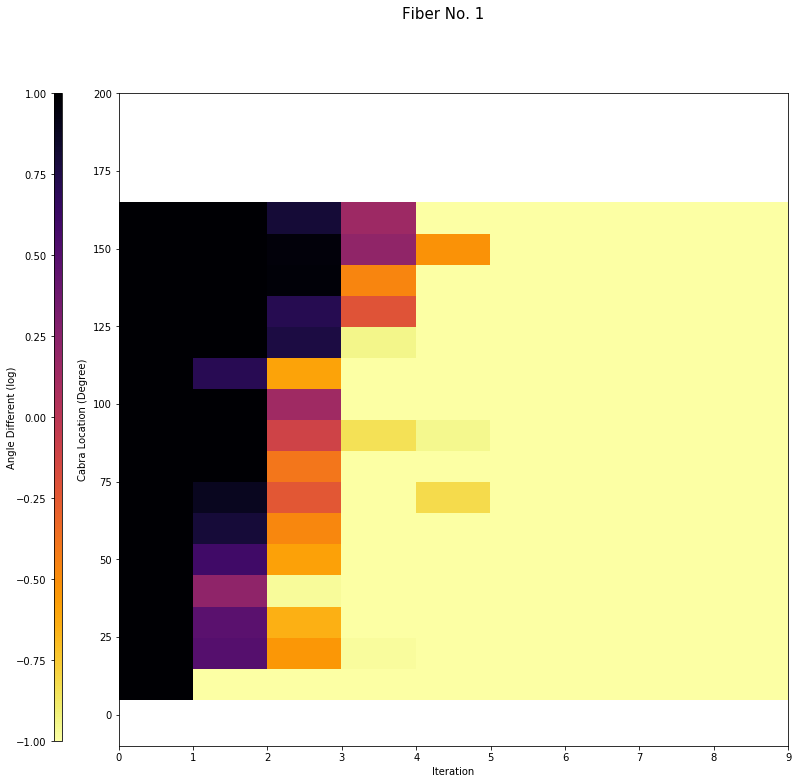

2020-02-04 23:01:27.455Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:27.574Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


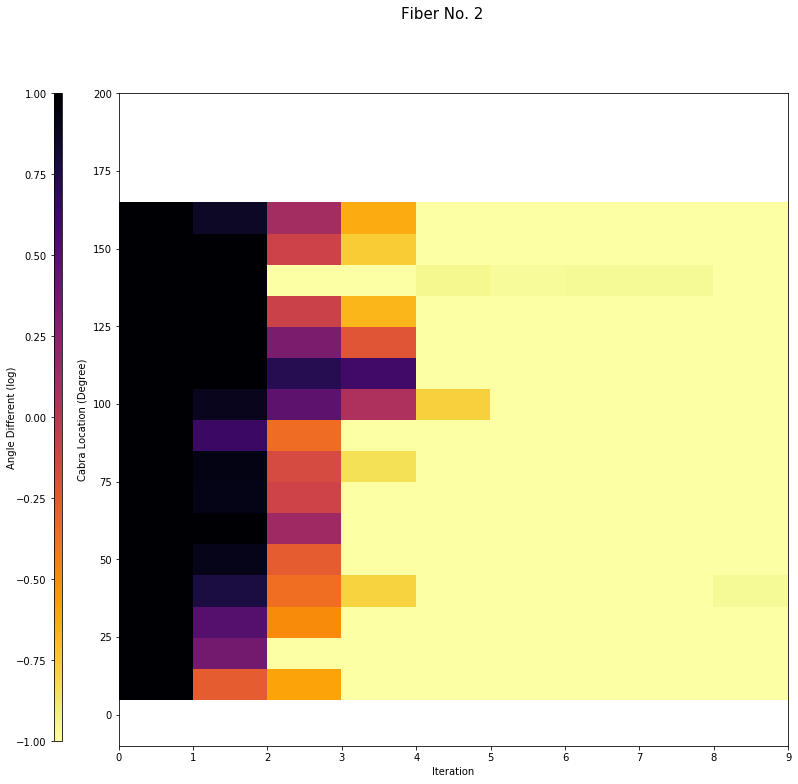

2020-02-04 23:01:27.630Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:27.749Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


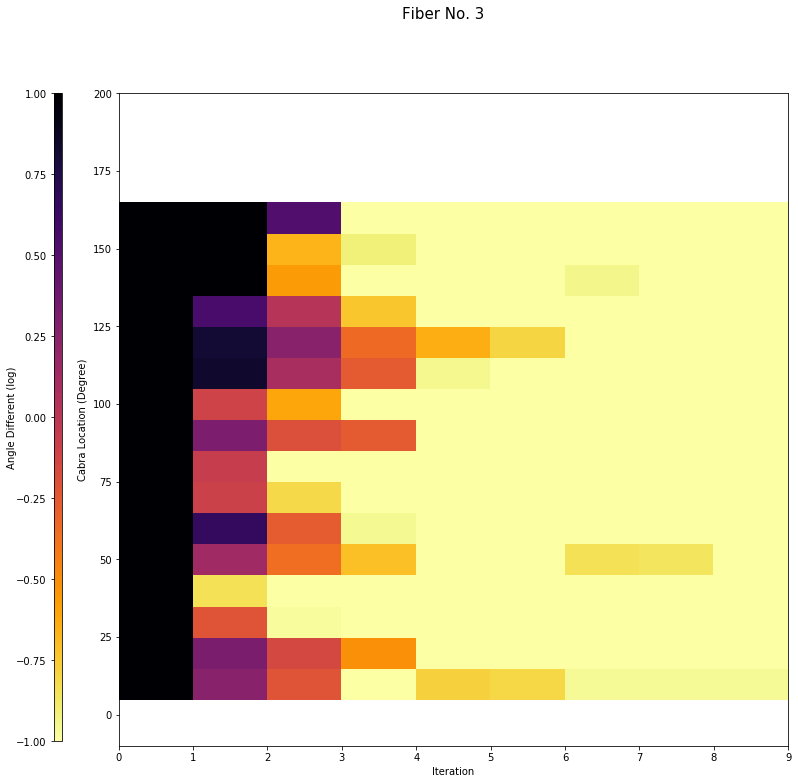

2020-02-04 23:01:27.806Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:27.924Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


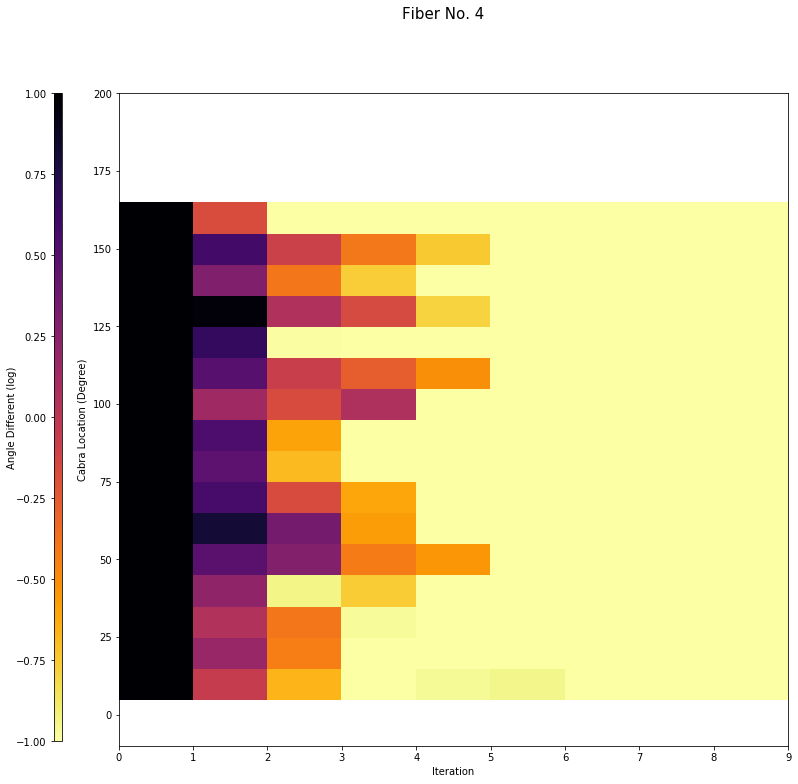

2020-02-04 23:01:27.981Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.100Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


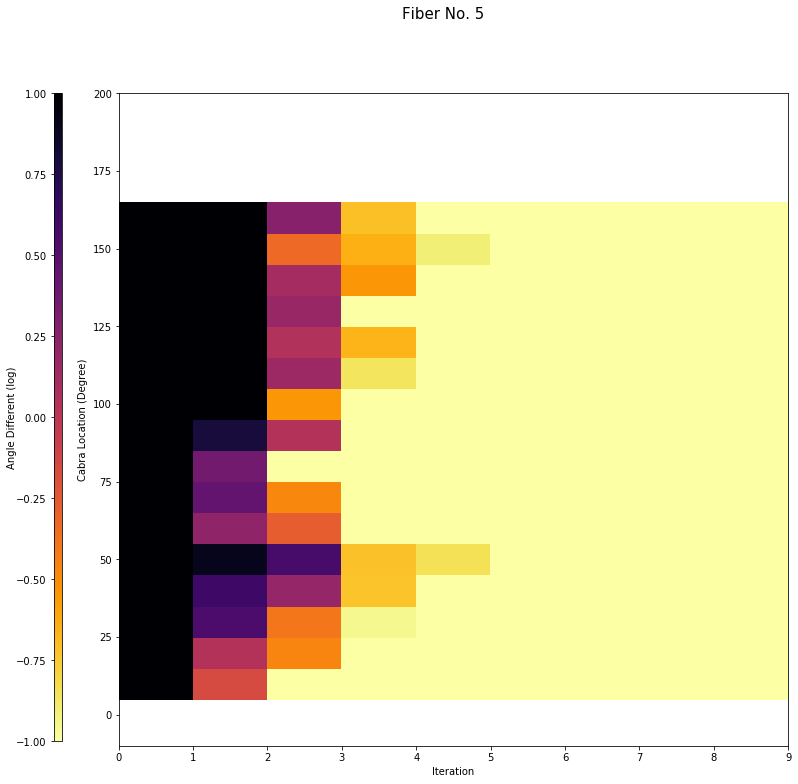

2020-02-04 23:01:28.157Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.276Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


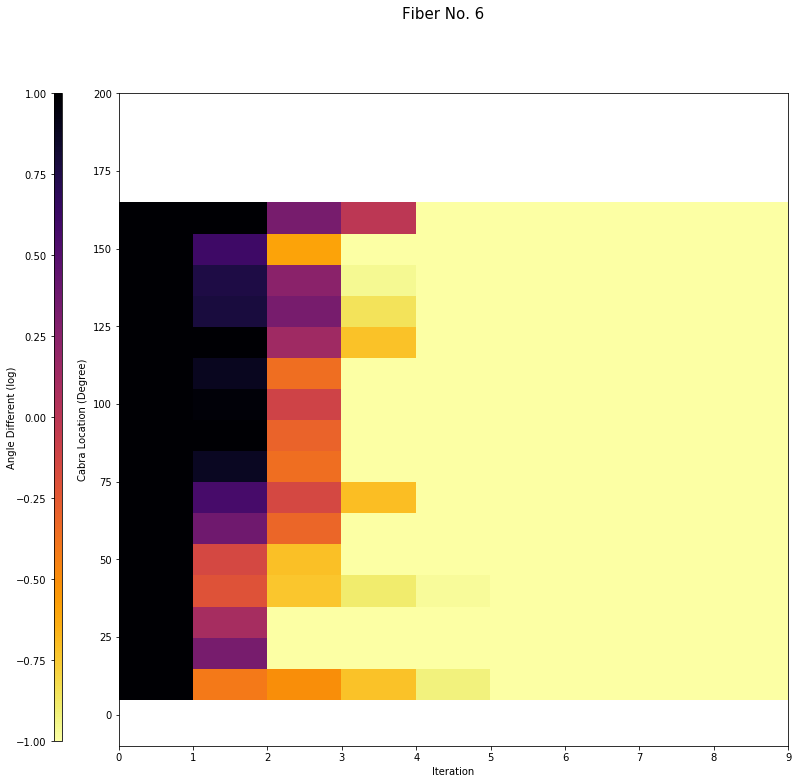

2020-02-04 23:01:28.333Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.452Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


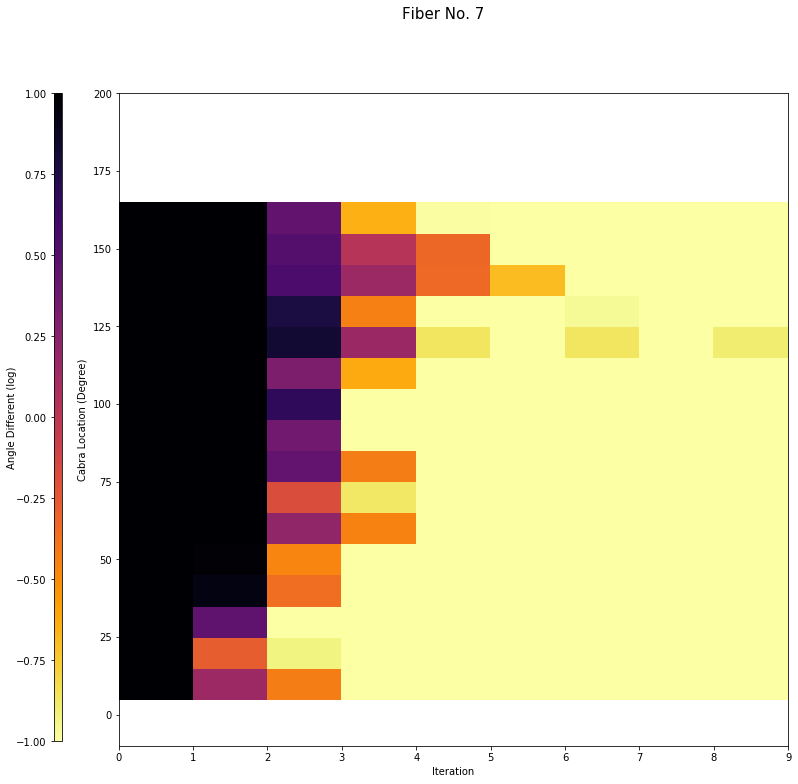

2020-02-04 23:01:28.508Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.627Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


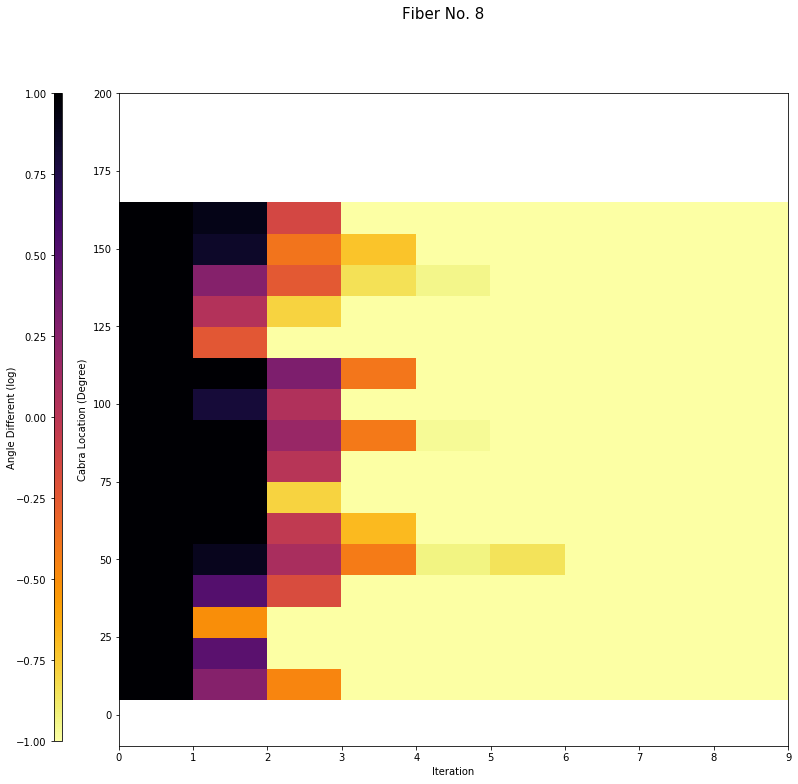

2020-02-04 23:01:28.683Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.802Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


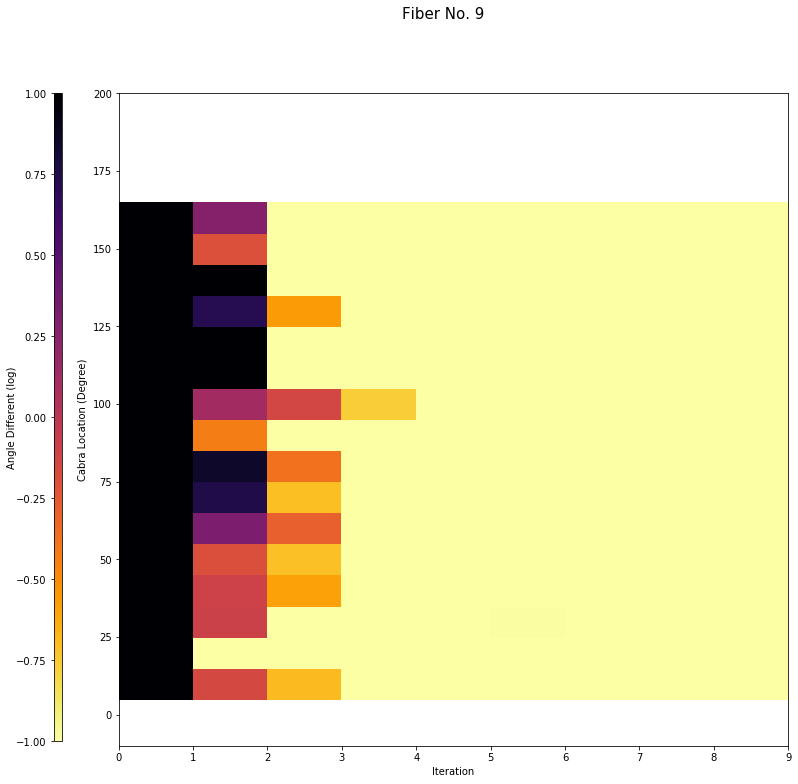

2020-02-04 23:01:28.858Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:28.977Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


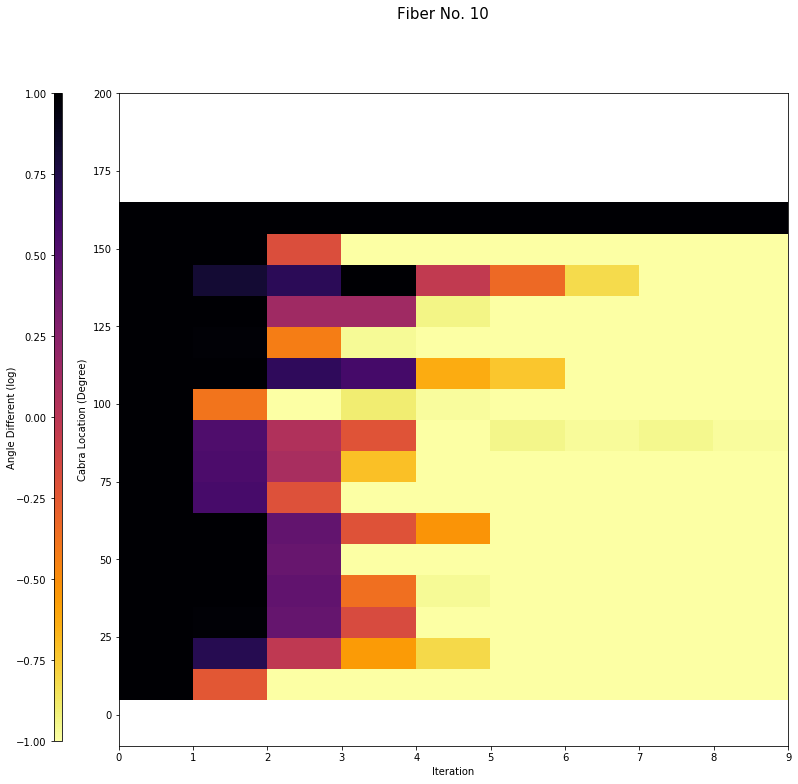

2020-02-04 23:01:29.033Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:29.152Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


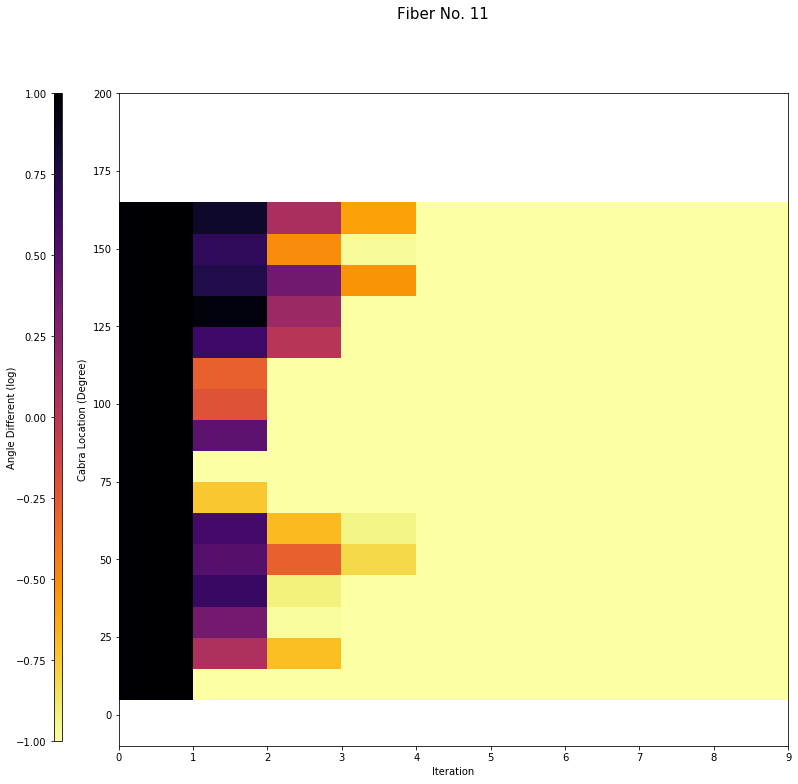

2020-02-04 23:01:29.209Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:29.329Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


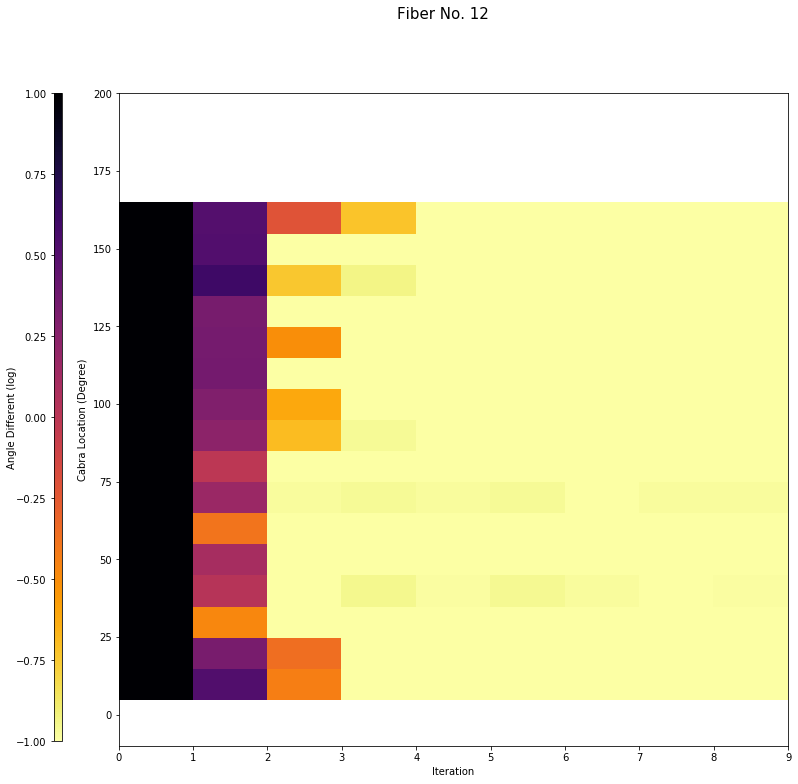

2020-02-04 23:01:29.386Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:29.505Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


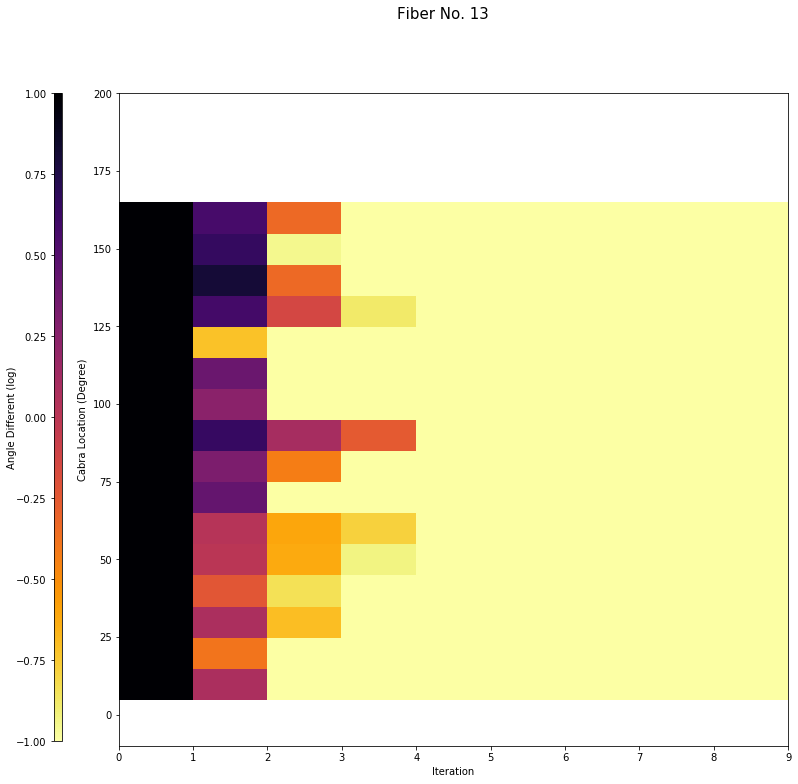

2020-02-04 23:01:29.561Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:29.680Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


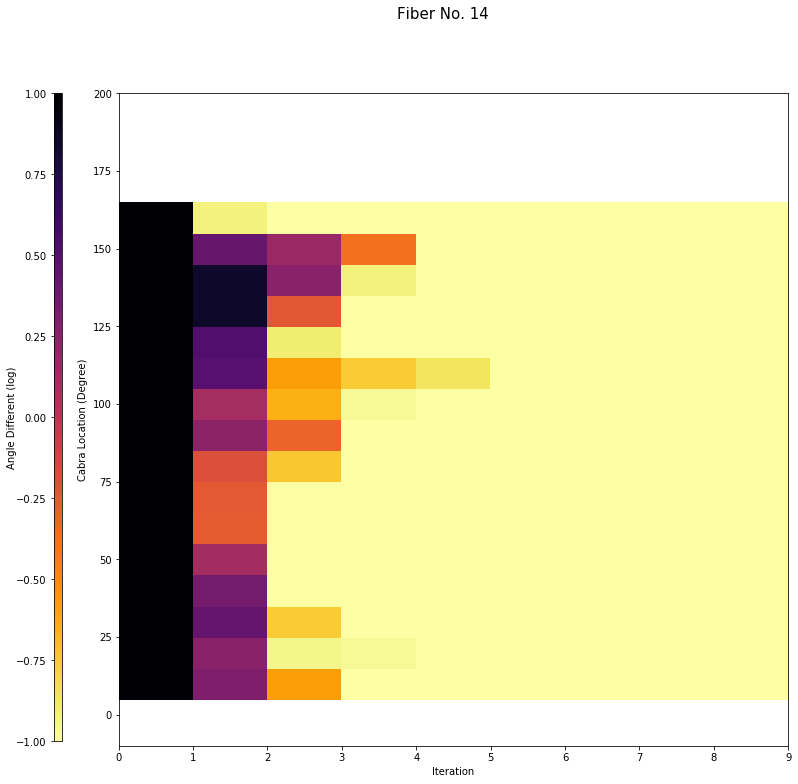

2020-02-04 23:01:29.736Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:29.855Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


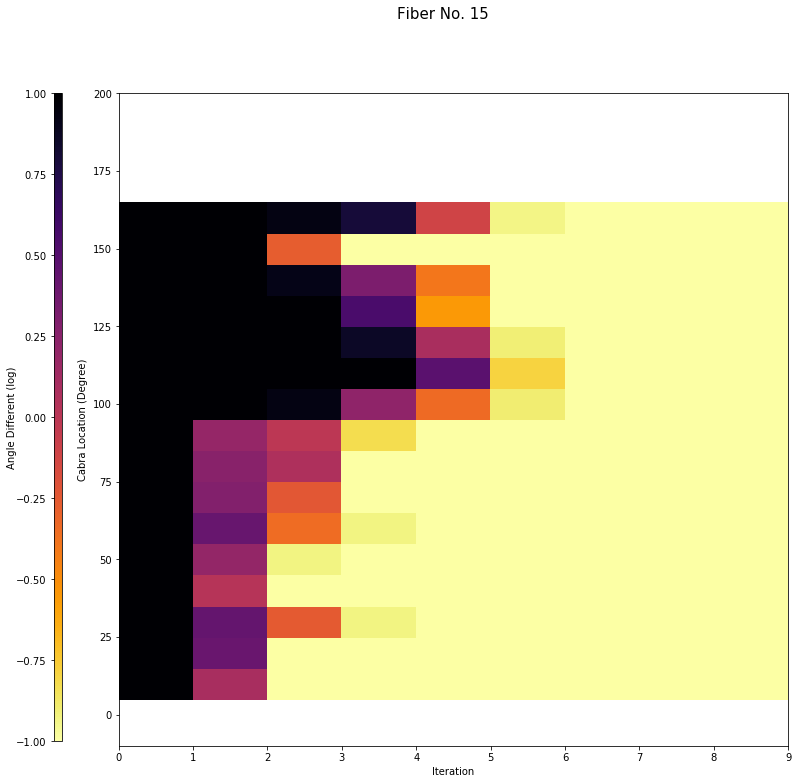

2020-02-04 23:01:29.911Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.030Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


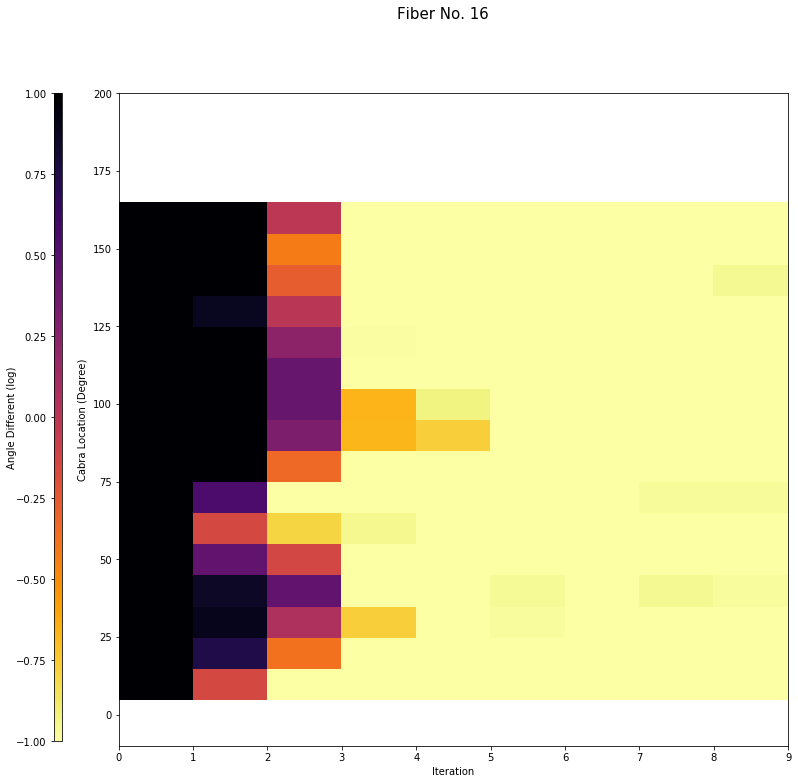

2020-02-04 23:01:30.087Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.206Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


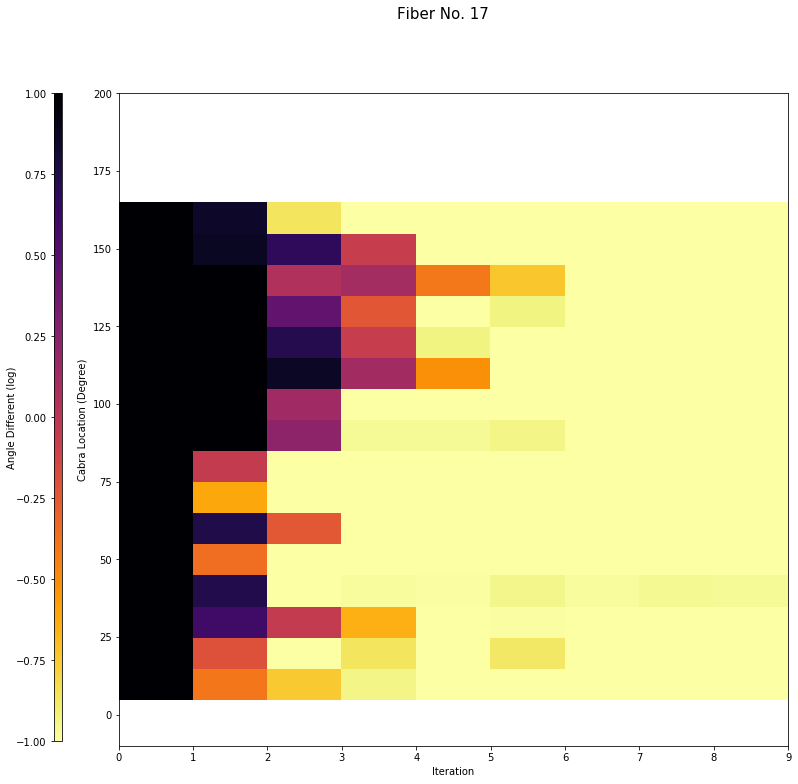

2020-02-04 23:01:30.263Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.383Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


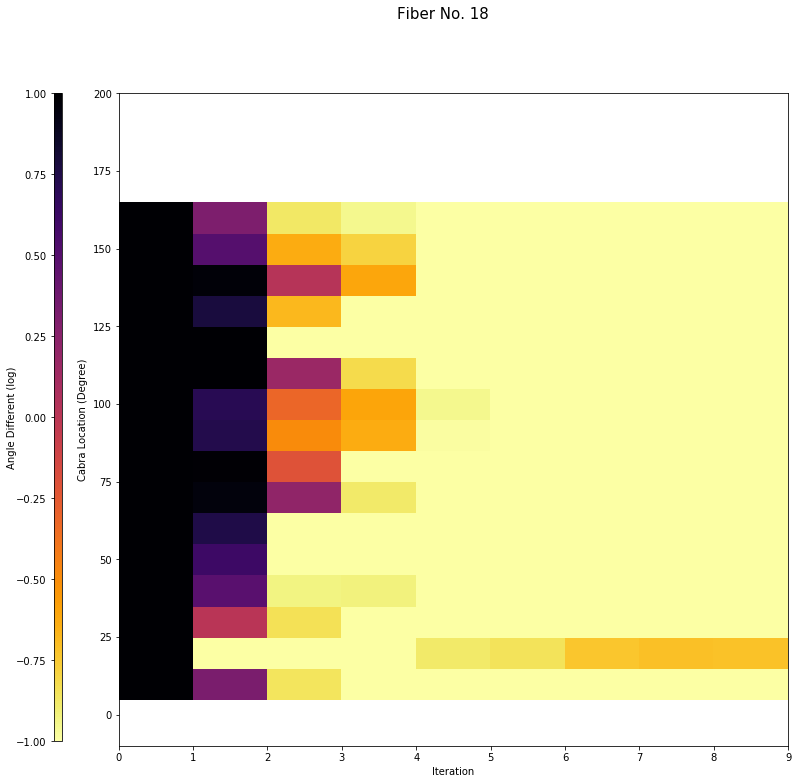

2020-02-04 23:01:30.439Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.558Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


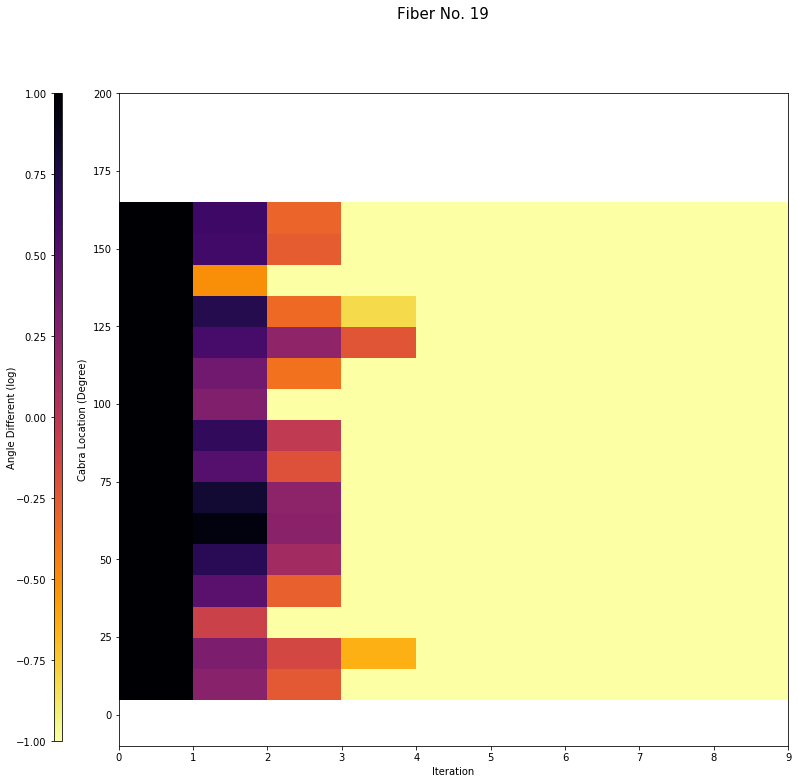

2020-02-04 23:01:30.614Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.733Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


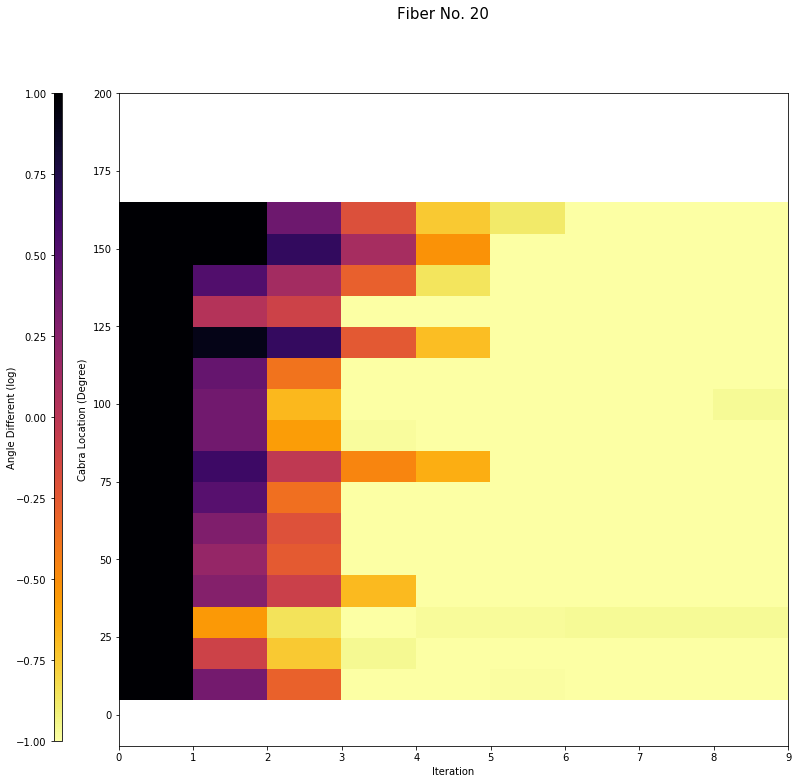

2020-02-04 23:01:30.790Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:30.909Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


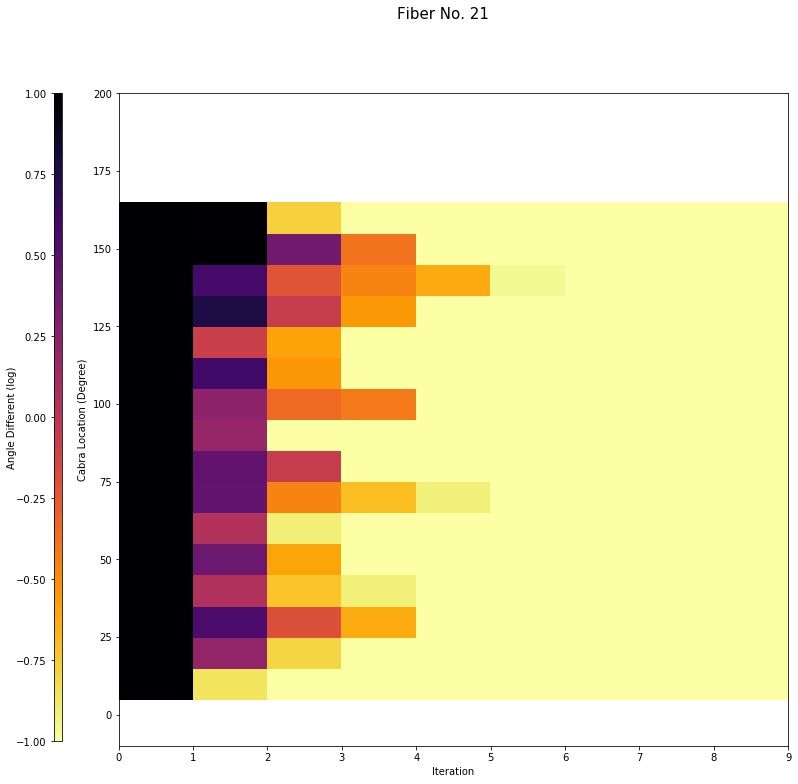

2020-02-04 23:01:30.966Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.085Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


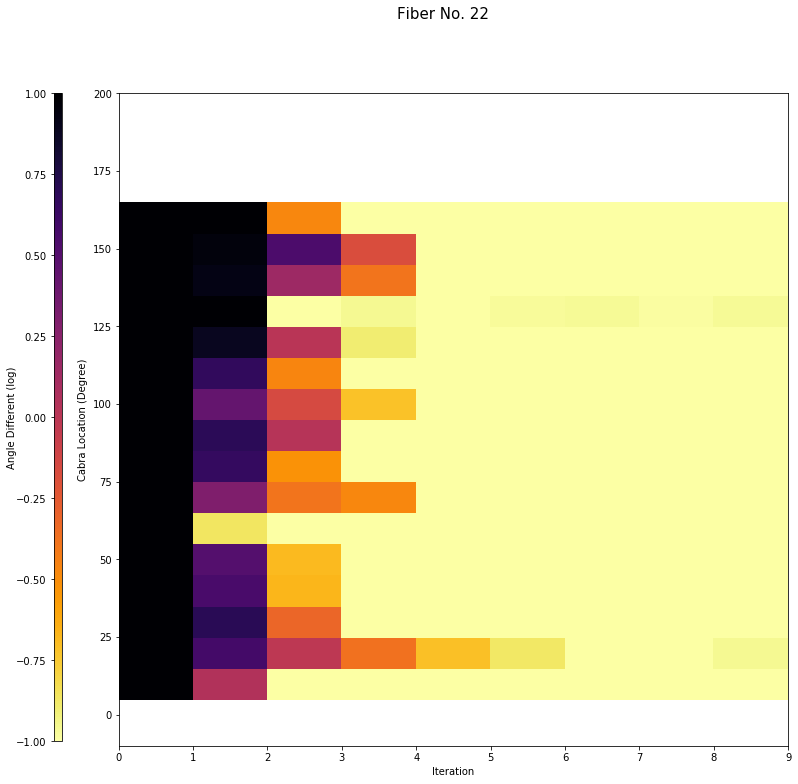

2020-02-04 23:01:31.142Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.262Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


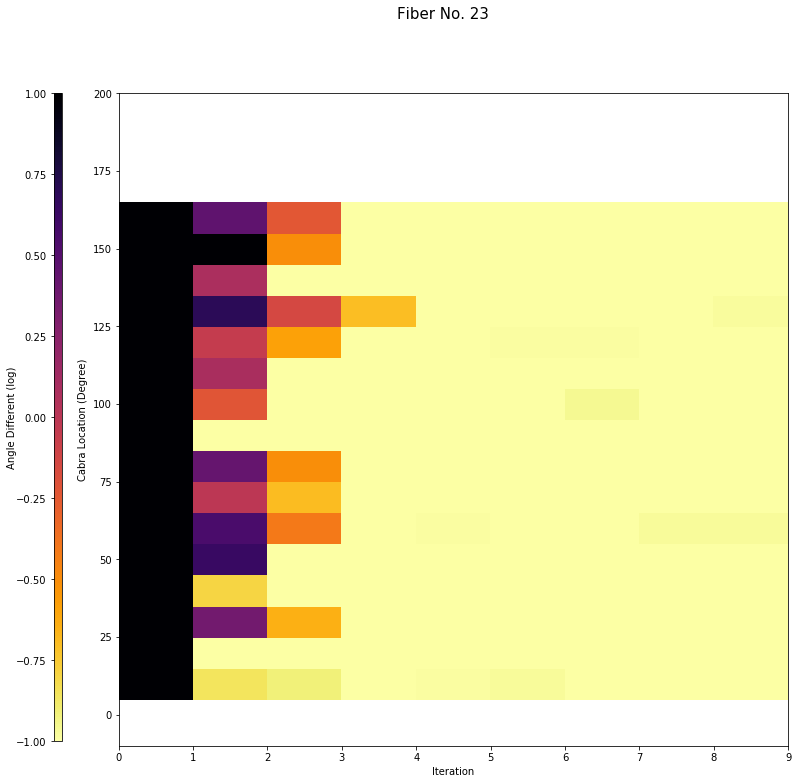

2020-02-04 23:01:31.318Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.437Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


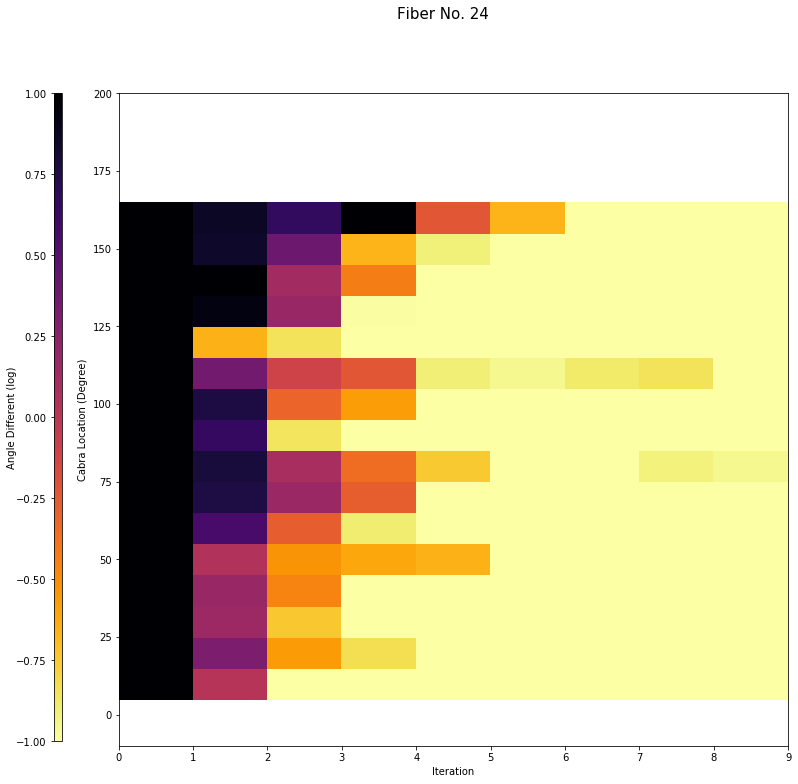

2020-02-04 23:01:31.494Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.613Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


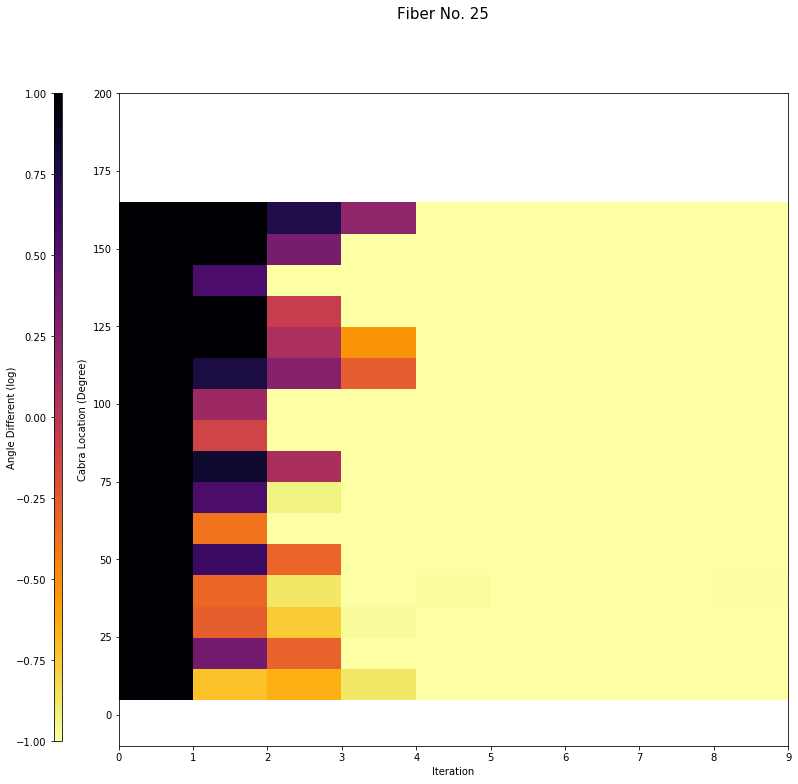

2020-02-04 23:01:31.670Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.789Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


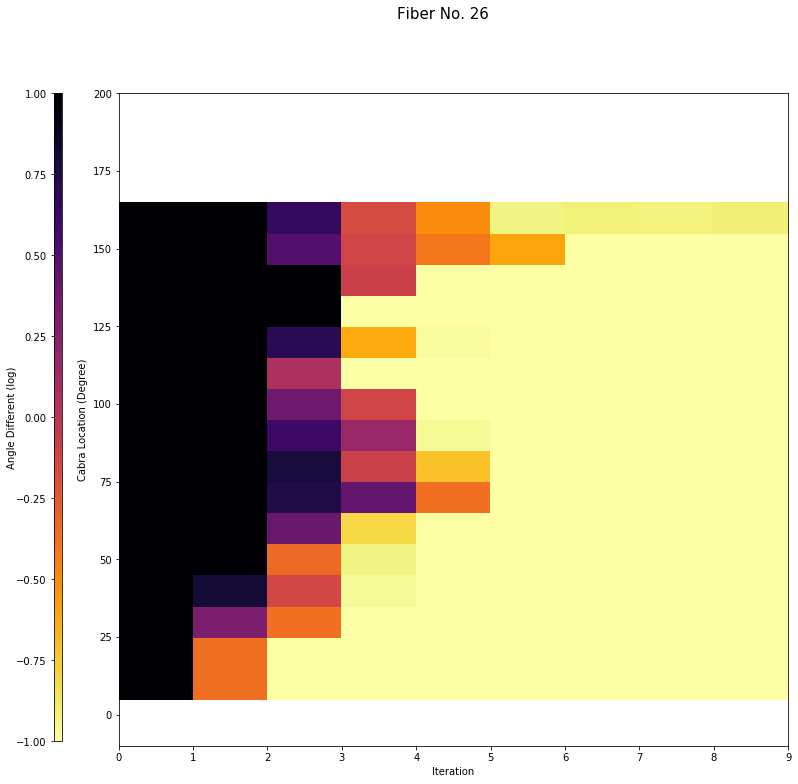

2020-02-04 23:01:31.846Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:31.965Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


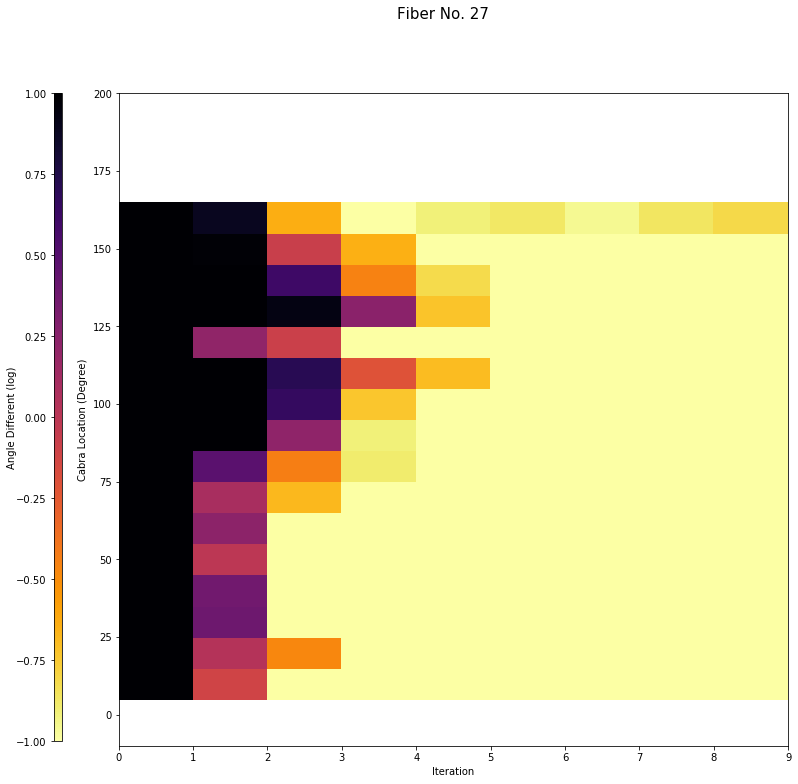

2020-02-04 23:01:32.021Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:32.141Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


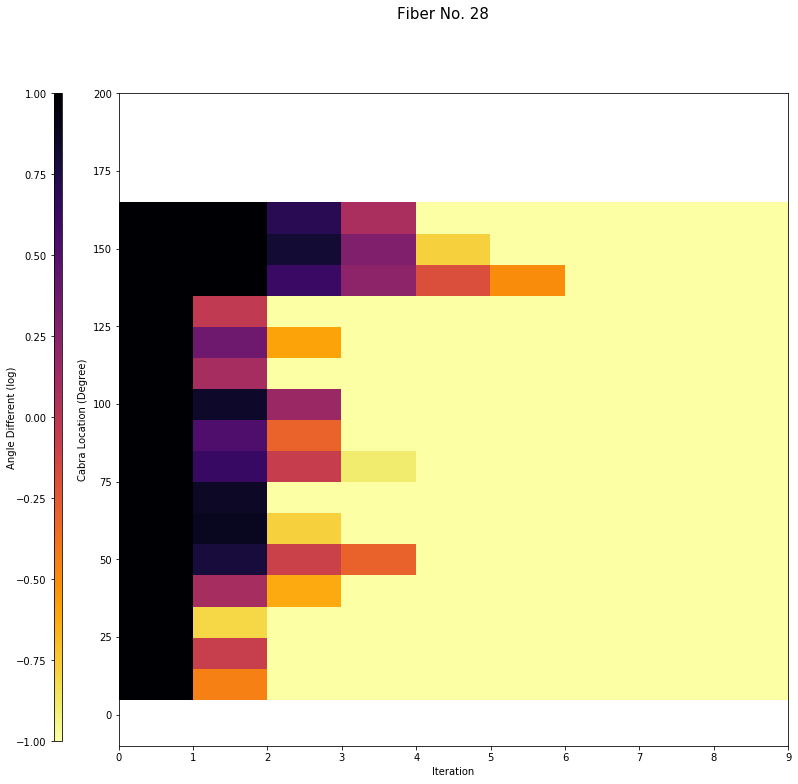

2020-02-04 23:01:32.198Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:32.318Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


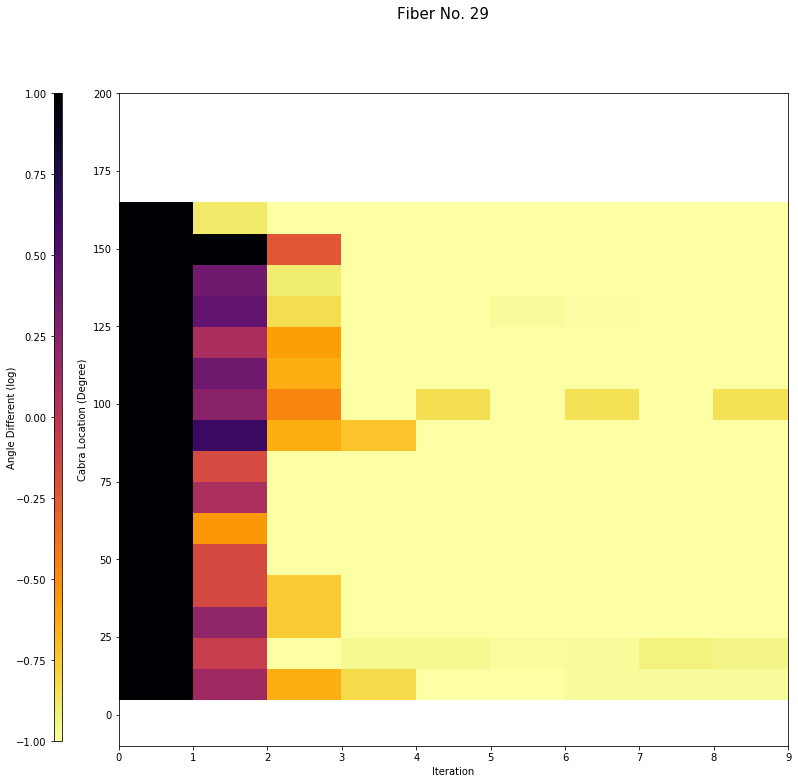

2020-02-04 23:01:32.375Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:32.494Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


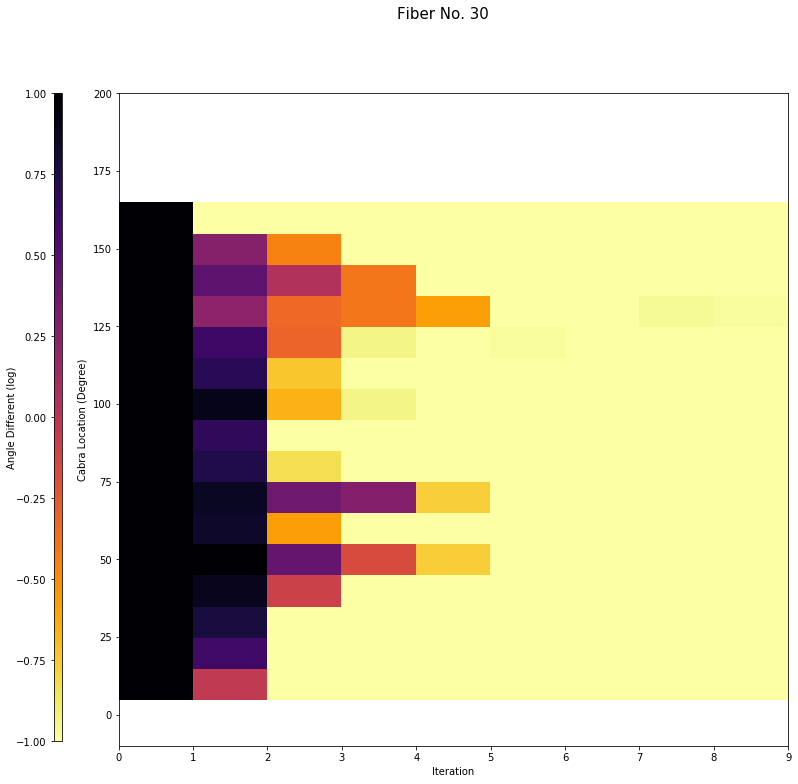

2020-02-04 23:01:32.550Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:32.669Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


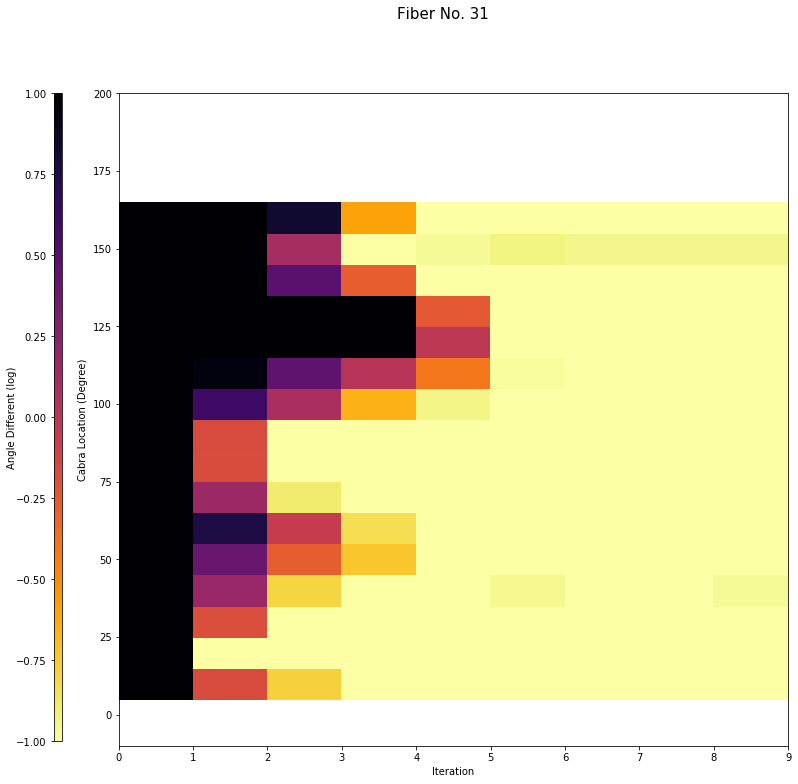

2020-02-04 23:01:32.727Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:32.846Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


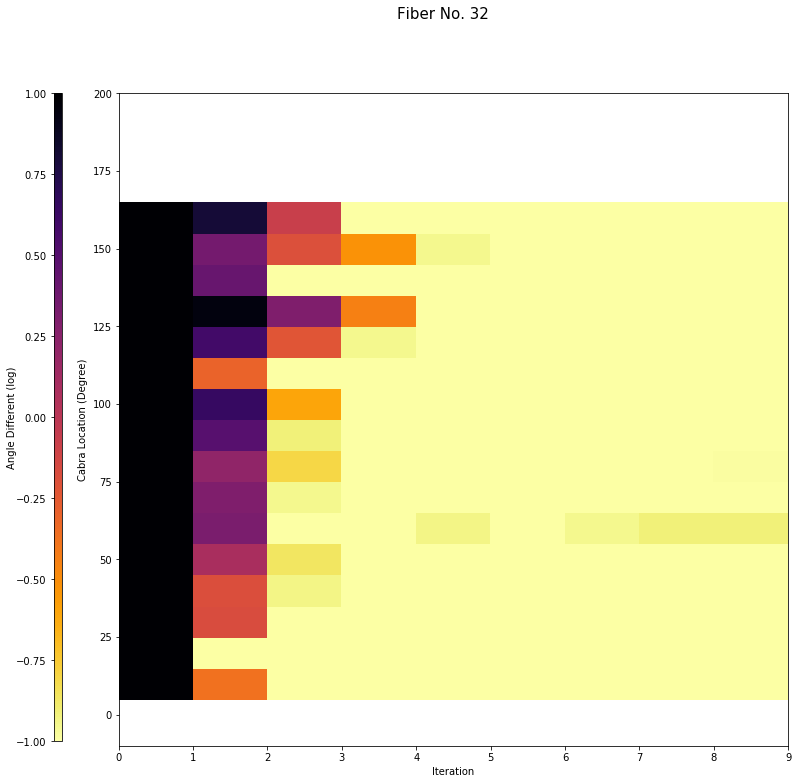

2020-02-04 23:01:32.902Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.021Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


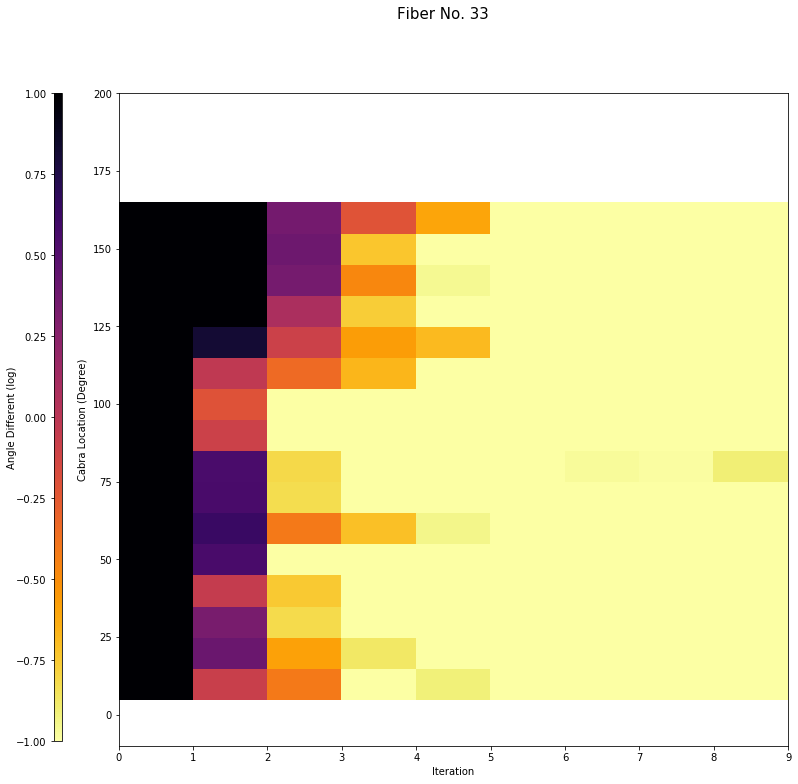

2020-02-04 23:01:33.078Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.197Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


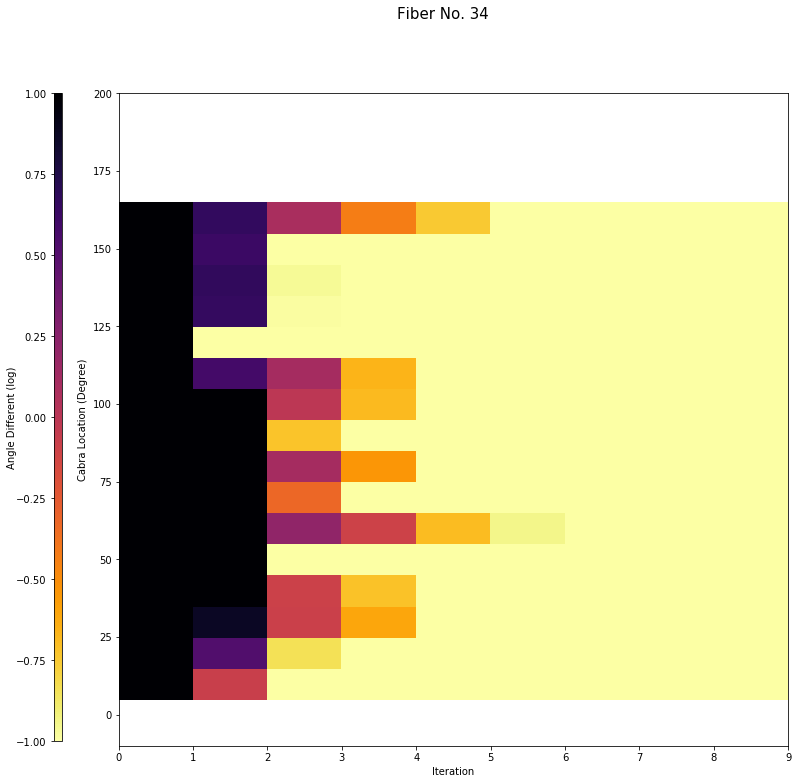

2020-02-04 23:01:33.254Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.373Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


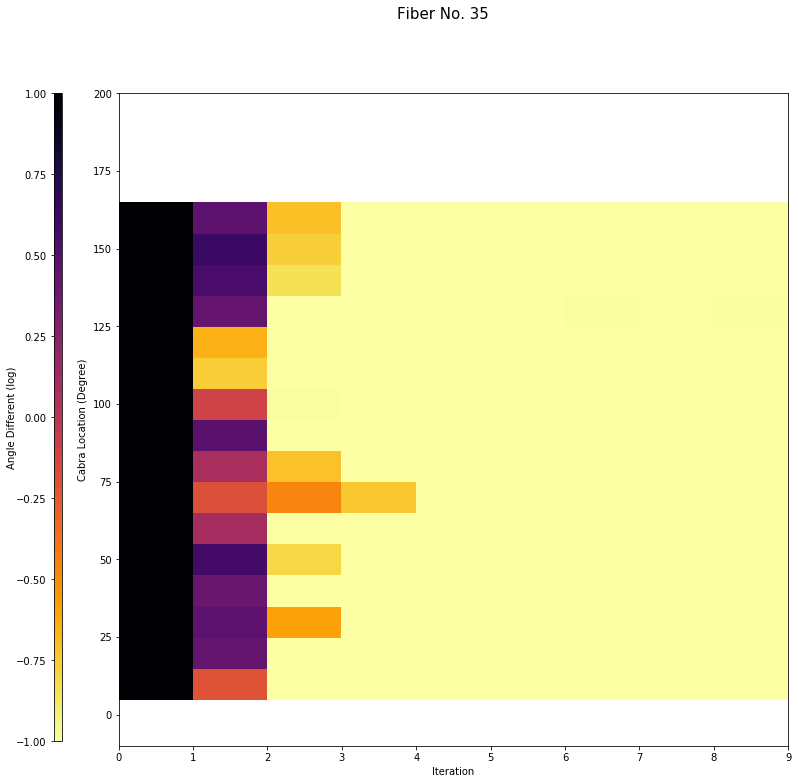

2020-02-04 23:01:33.430Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.550Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


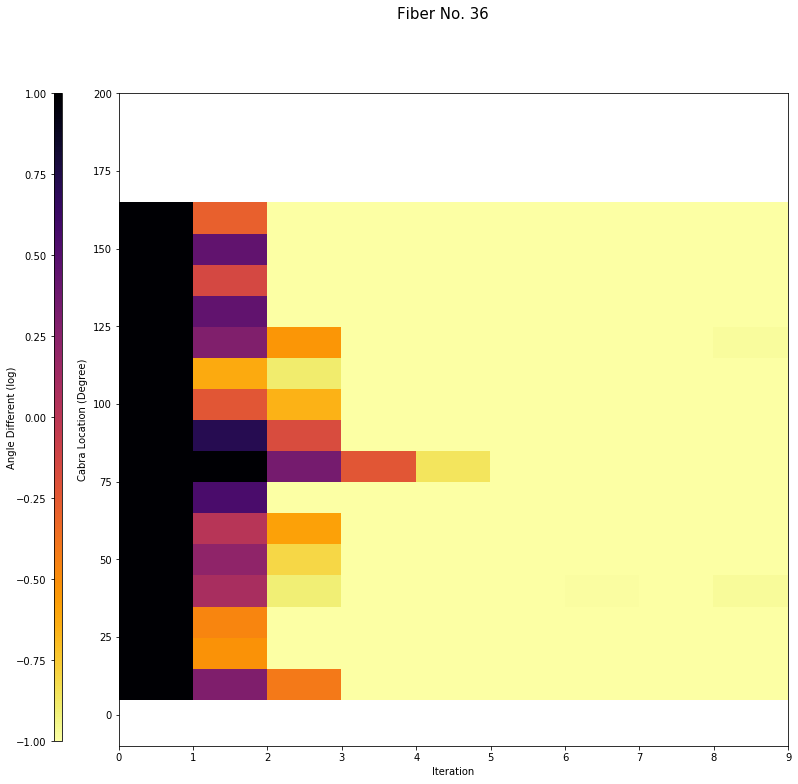

2020-02-04 23:01:33.606Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.725Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


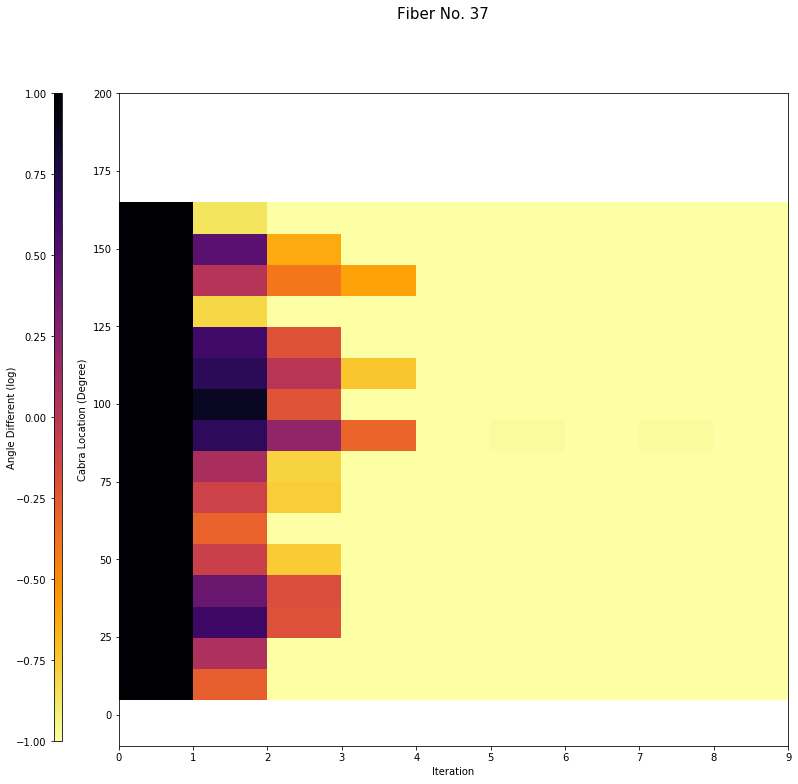

2020-02-04 23:01:33.783Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:33.901Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


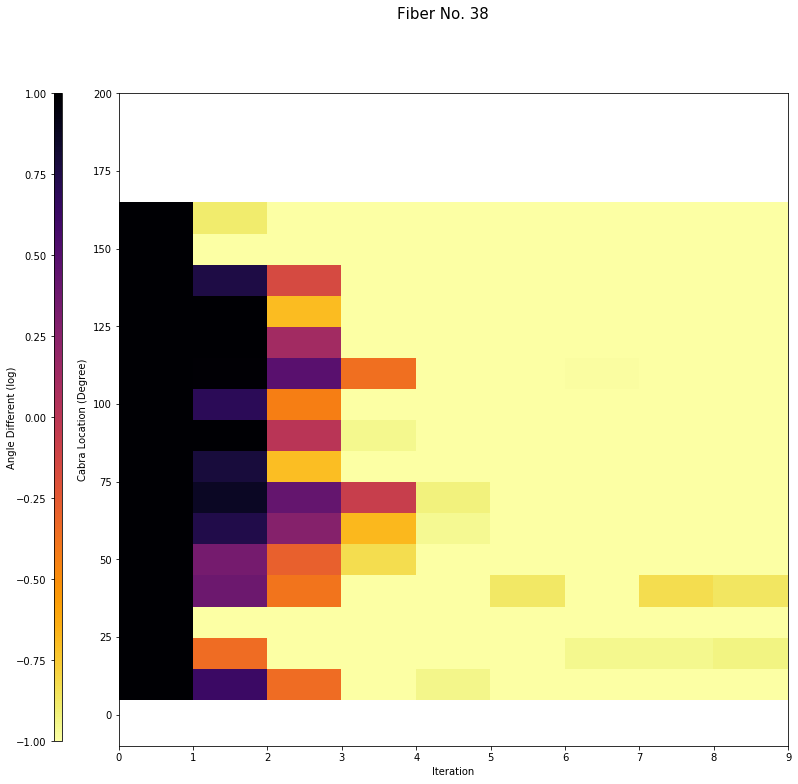

2020-02-04 23:01:33.958Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.077Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


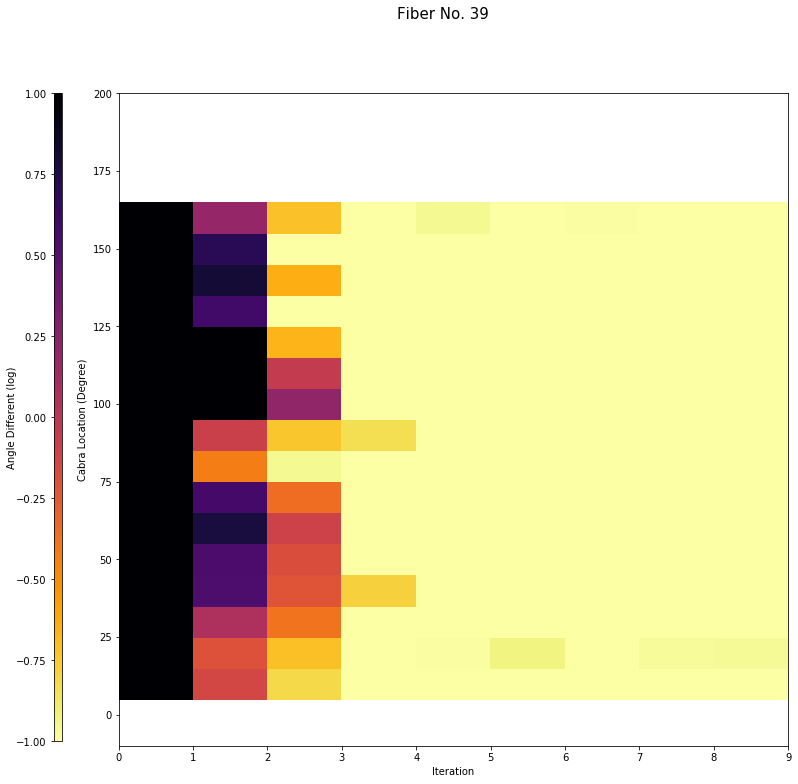

2020-02-04 23:01:34.134Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.254Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


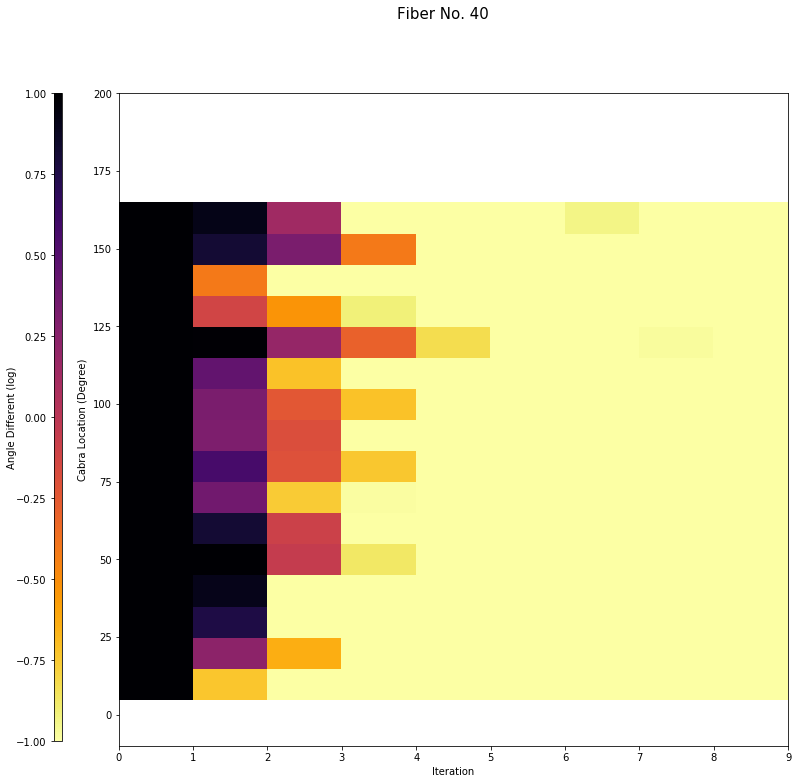

2020-02-04 23:01:34.310Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.430Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


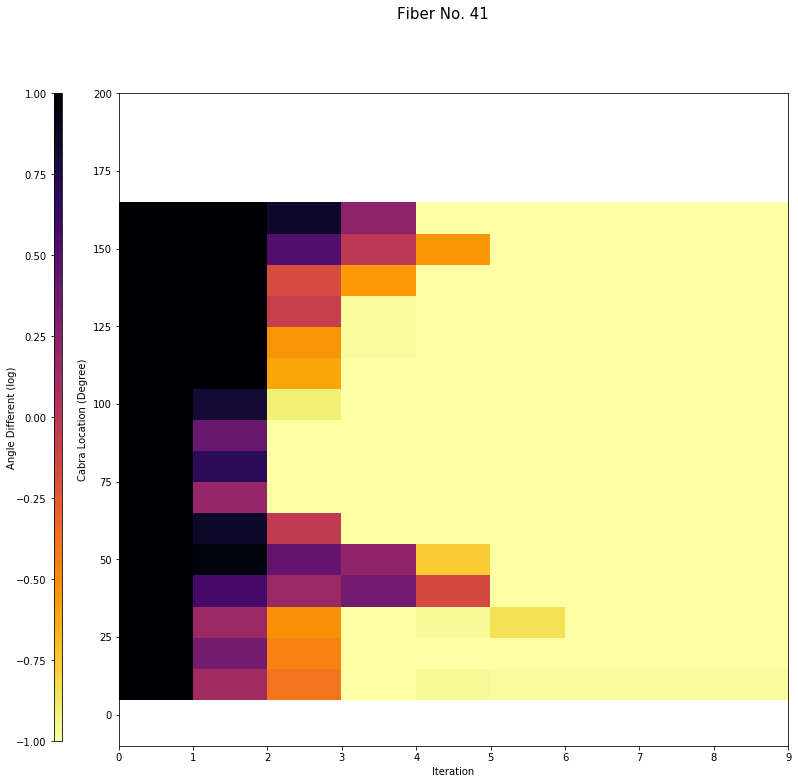

2020-02-04 23:01:34.487Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.606Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


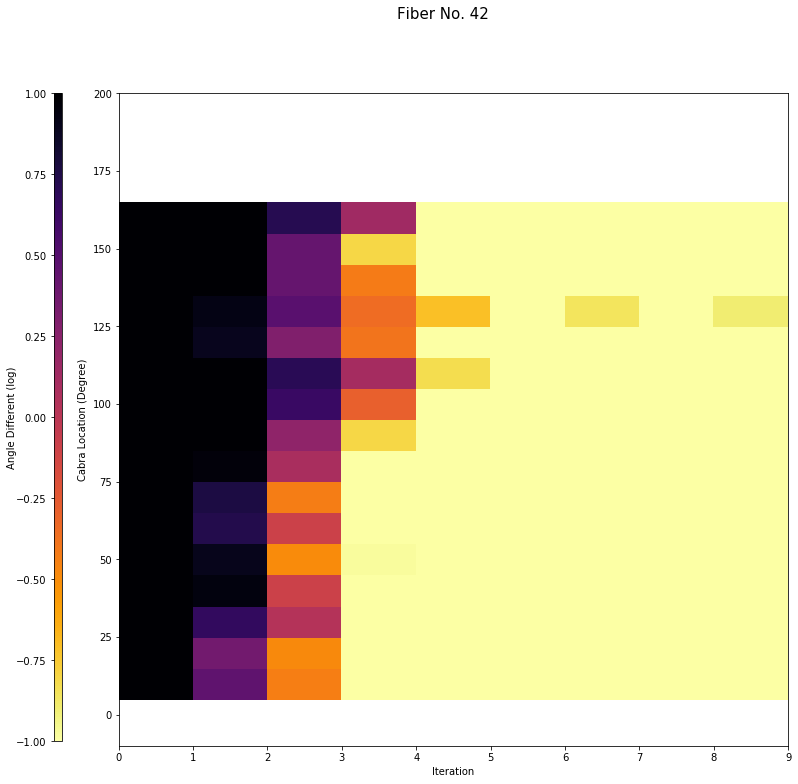

2020-02-04 23:01:34.662Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.782Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


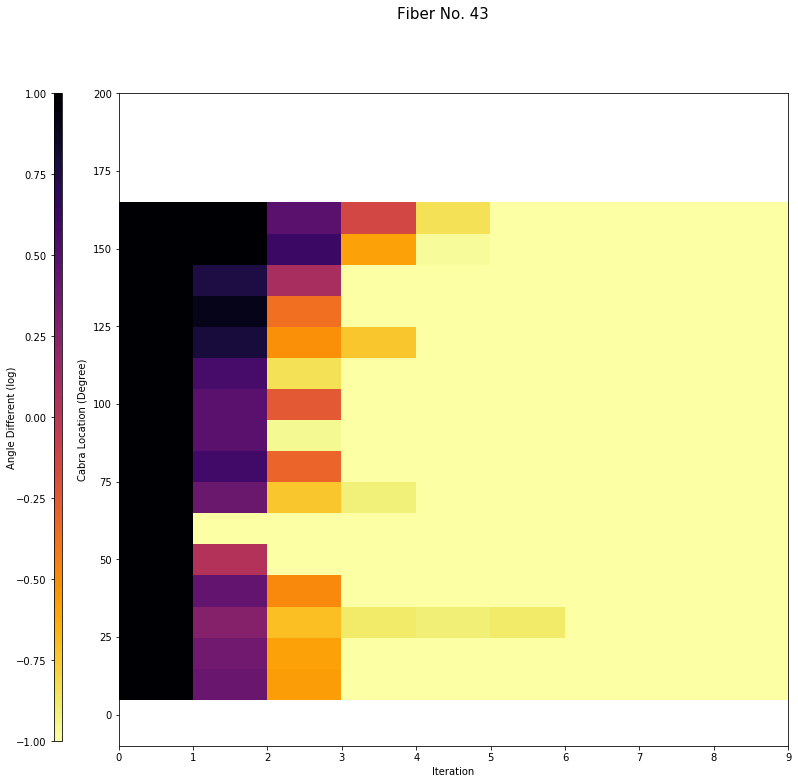

2020-02-04 23:01:34.838Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:34.957Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


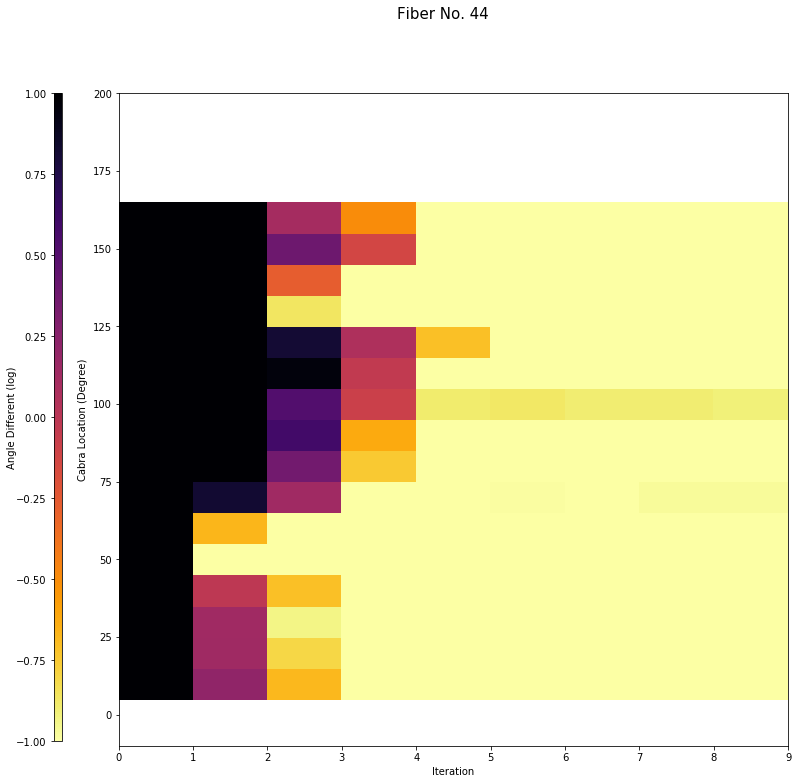

2020-02-04 23:01:35.013Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:35.132Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


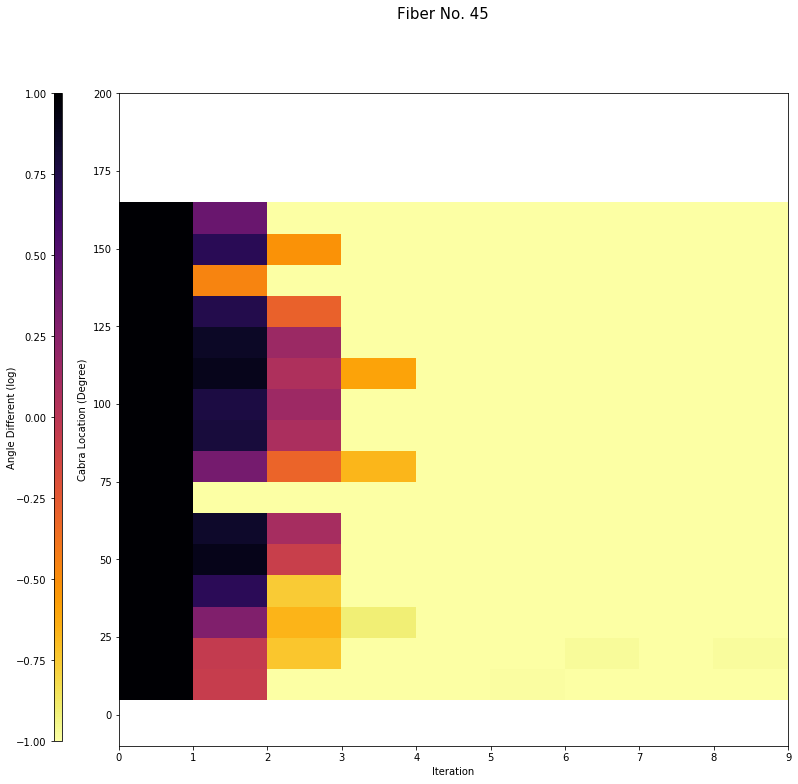

2020-02-04 23:01:35.188Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:35.307Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


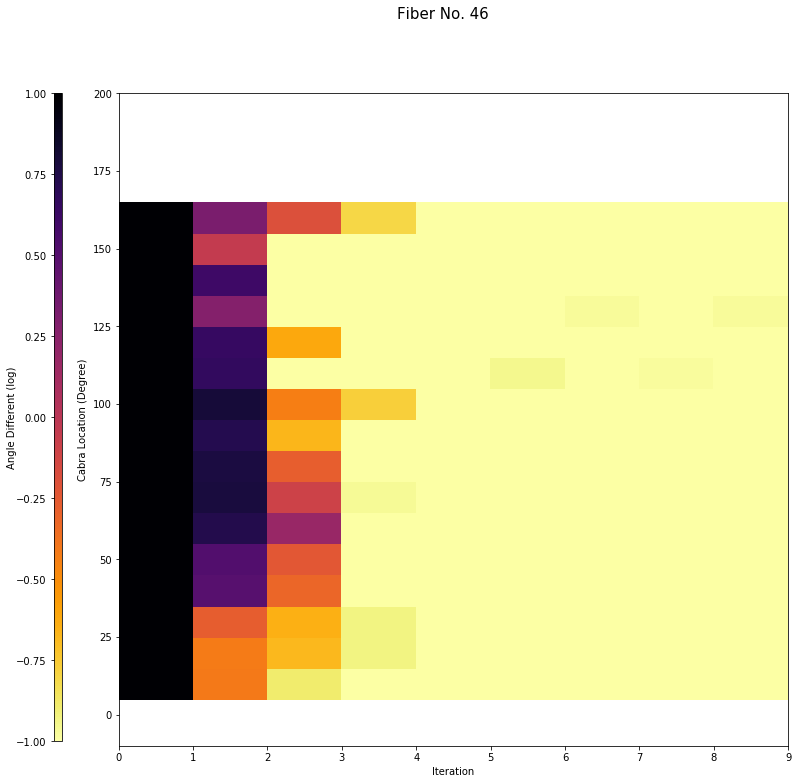

2020-02-04 23:01:35.363Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:35.482Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


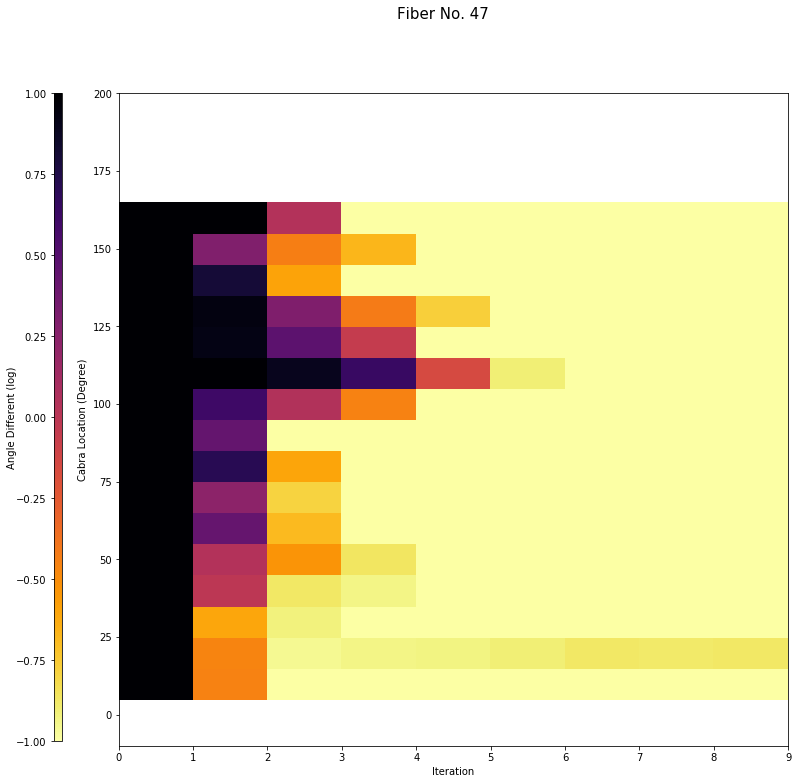

2020-02-04 23:01:35.538Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:35.658Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


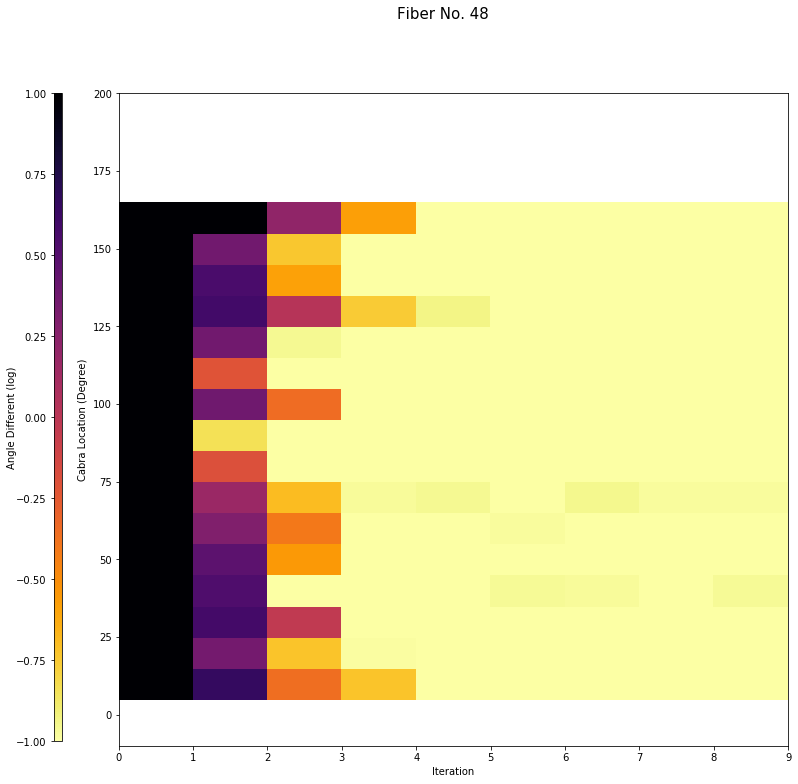

2020-02-04 23:01:35.715Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:35.833Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


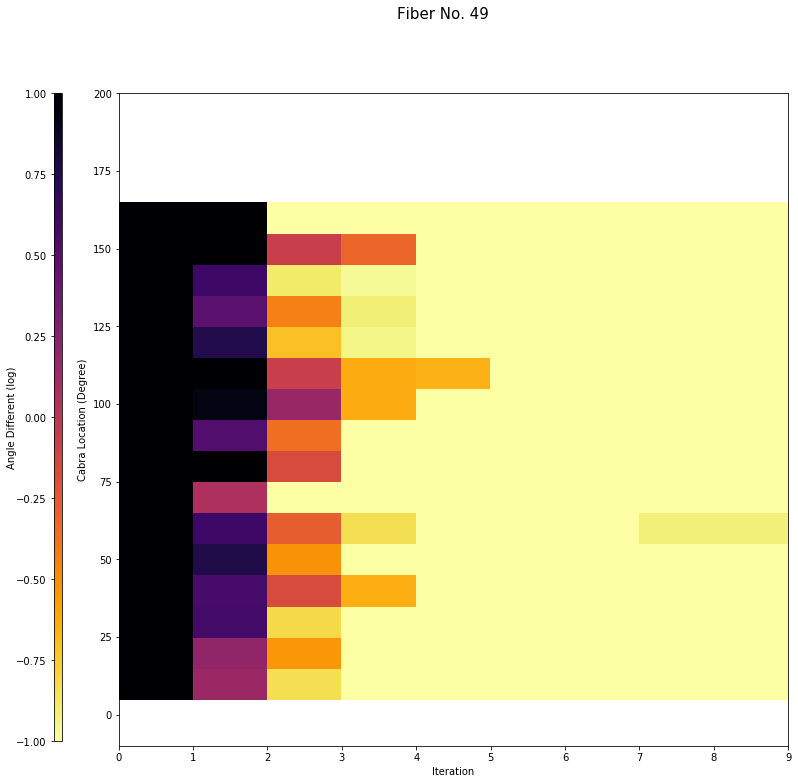

2020-02-04 23:01:35.890Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.009Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


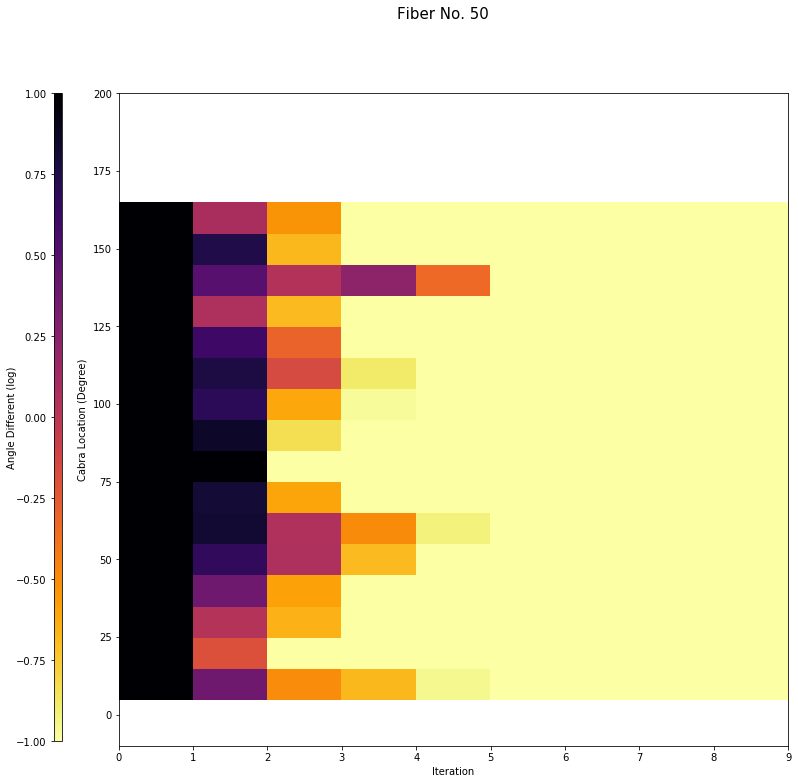

2020-02-04 23:01:36.065Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.184Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


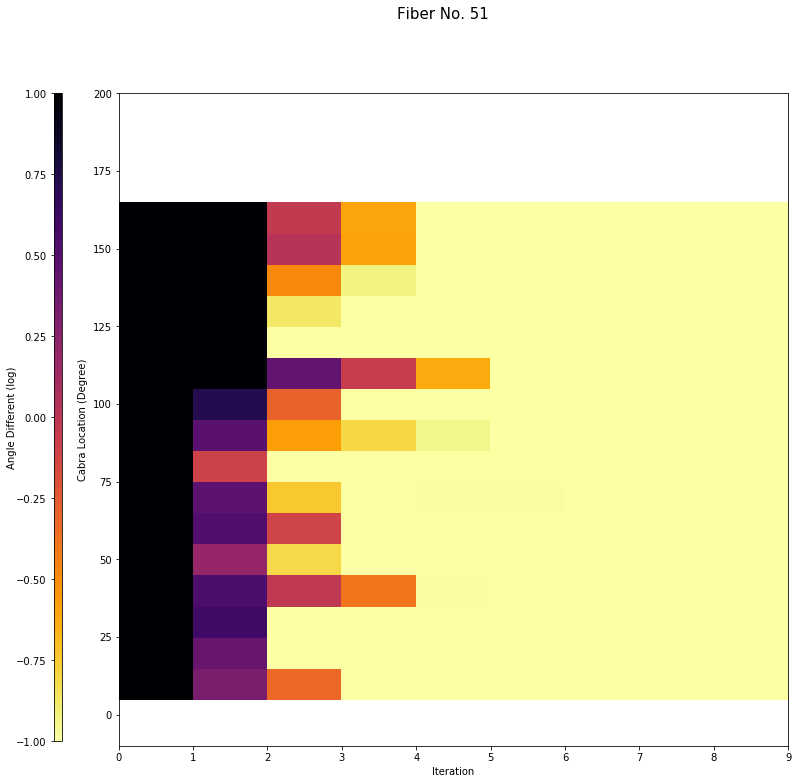

2020-02-04 23:01:36.241Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.360Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


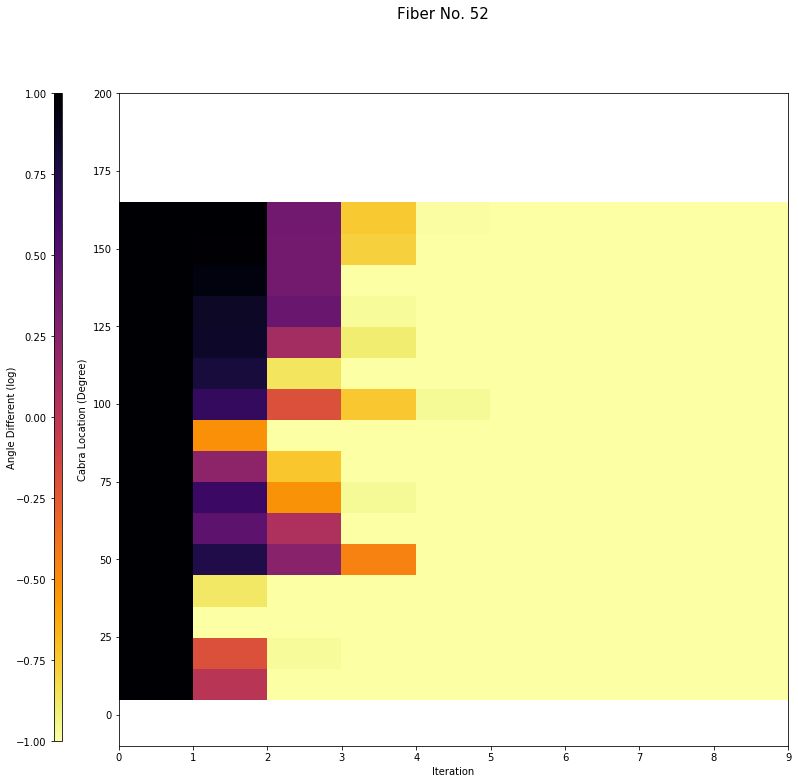

2020-02-04 23:01:36.417Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.536Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


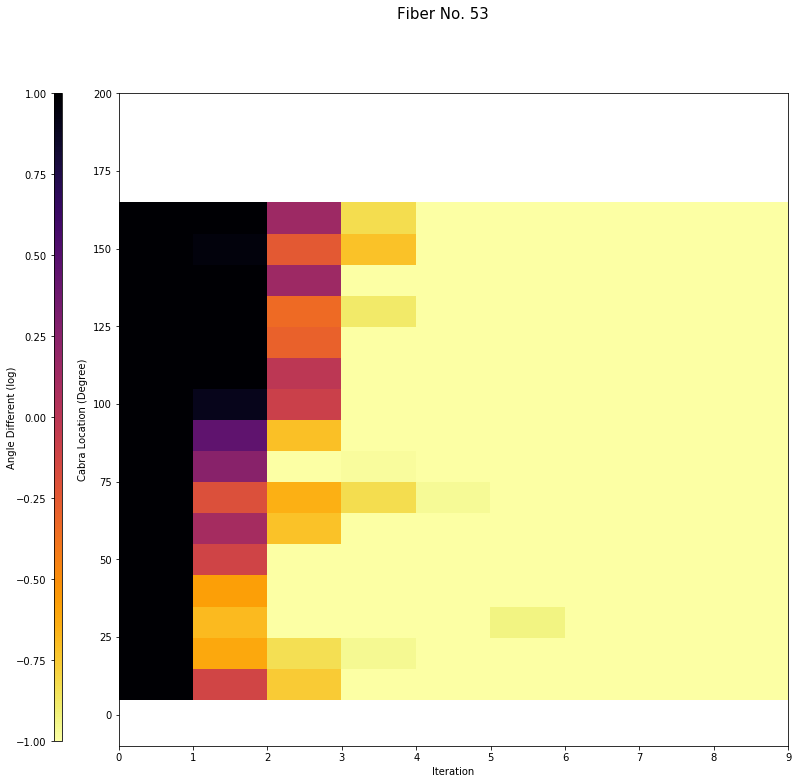

2020-02-04 23:01:36.593Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.712Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


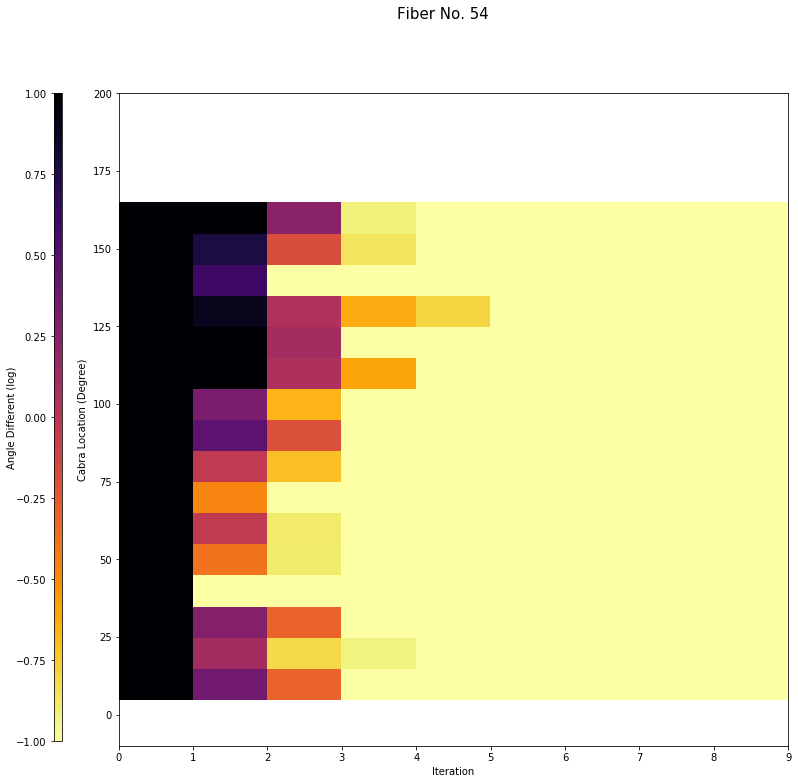

2020-02-04 23:01:36.768Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:36.888Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


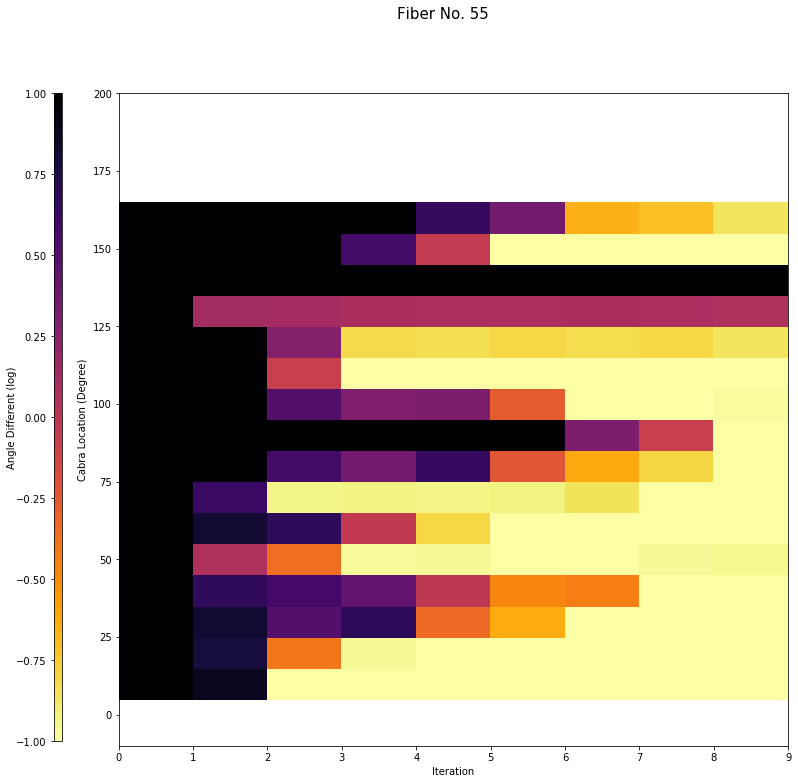

2020-02-04 23:01:36.944Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-04 23:01:37.063Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout


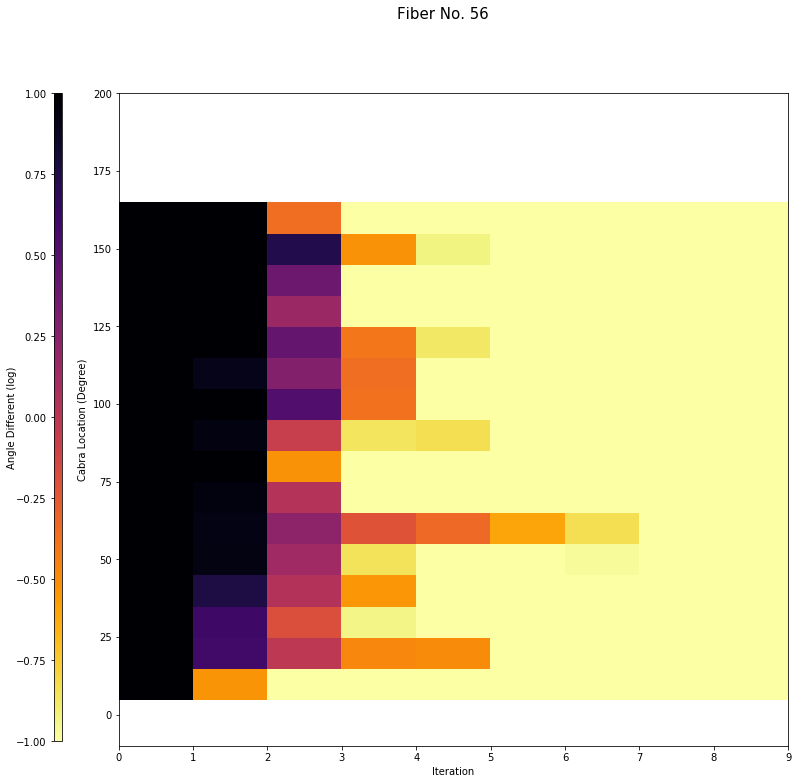

In [20]:
reload(visDianosticPlot)
vis = visDianosticPlot.VisDianosticPlot('/data/MCS/20200129_007/data/', brokens=broken, camSplit=28)
vis.visConvergeDiffPlot(figPath=f'/data/MCS/20200129_007/output/',runs = 16,
                    arm='phi',pdffile= f'/data/MCS/20200129_007/output/convergeDiff_phi.pdf', snrplot=False)

vis.visConvergeAnglePlot(figPath=f'/data/MCS/20200129_007/output/',runs = 16,
                    arm='phi',pdffile= f'/data/MCS/20200129_007/output/convergeAngle_phi.pdf', snrplot=False)



# Move to 60 degree

In [ ]:

xml = pathlib.Path('/data/MCS/20200129_005/output/phi_250step.xml')
broken=[]

mt = ModuleTest('fpga', xml, brokens=broken)
mt._connect()



In [ ]:
mt.setPhiGeometryFromRun(pathlib.Path('/data/MCS/20200129_005'), onlyIfClear=False)

In [ ]:

mt.moveToPhiAngle(angle=60.0, keepExistingPosition=False)


# Theta ROM

In [ ]:
mt.makeThetaMotorMap('SC32_theta_250.xml', steps=250, repeat=3, totalSteps=12000)

In [ ]:
broken=[]
path=f'/data/MCS/20200129_010/data/'
vis = visDianosticPlot.VisDianosticPlot(path, brokens=broken, camSplit=28)
vis.visPlotGeometry(arm='theta')

In [ ]:
vis.visPlotFiberDot(arm='theta')

# Theta on-time 

In [ ]:
del(mt)

In [ ]:
import ontimeOptimize
import pathlib
reload(ontimeOptimize)

brokens=[]
arm='theta'
xml =pathlib.Path('/data/MCS/20200129_010/output/SC32_theta_250.xml')
ontimeOptimize.exploreModuleOntime(brokens=brokens,
            arm=arm, iteration=5, XML=xml,repeat=3)

In [ ]:
datalist = ['/data/MCS/20200113_008/', 
            '/data/MCS/20200113_010/', 
            '/data/MCS/20200113_012/', 
            '/data/MCS/20200113_014/', 
            '/data/MCS/20200113_016/']

In [ ]:
import ontimeOptimize
reload(ontimeOptimize)
otm = ontimeOptimize.OntimeOptimize(brokens=brokens, thetaList = datalist)

In [ ]:
ndf=otm.dataframe.loc[otm.dataframe['fiberNo'] == 58]

In [ ]:
ndf.empty

In [ ]:
otm.pickForSlowSpeed()

# Theta motor map 

In [ ]:
del(mt)

In [ ]:
brokens=[]
xml =pathlib.Path('/data/MCS/20200129_022/output/theta_250step.xml')
mt = ModuleTest('fpga', xml, brokens=brokens)

runDir=mt.makeThetaMotorMap('SC32_theta_250.xml', steps=250, repeat=5, totalSteps=12000, fromHome=True)

2020-01-29 14:52:18.208Z butler           30 butler.py:58 newRun: /data/MCS/20200129_027
2020-01-29 14:52:18.210Z fpgaIO           20 pfi.py:57 FPGA connection to 128.149.77.24
/home/pfs/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:54: UserWarning: please use PFIDesign.loadModule() or PFIDesign.loadPFI()
  warnings.warn('please use PFIDesign.loadModule() or PFIDesign.loadPFI()')
2020-01-29 14:52:18.241Z pfi              20 pfi.py:73 load cobra model from /data/MCS/20200129_022/output/theta_250step.xml
2020-01-29 14:52:18.277Z camera           20 asrdCam.py:17 asrd...
2020-01-29 14:52:18.310Z moduleTest       20 moduleTest.py:1214 theta home -12000 steps
timed out (30.015 s) waiting for 6 bytes. Received 0 bytes: array('B')


IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103536358
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103541788
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:00.321Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:03.650Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:07.987Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:13.620Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 1000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:20.565Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 1250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:28.675Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 1500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:37.997Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 1750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:53:48.638Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 2000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:54:00.587Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 2250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:54:13.726Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 2500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:54:28.164Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 2750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:54:43.759Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 3000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:55:00.573Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 3250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:55:18.646Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 3500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:55:37.962Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 3750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:55:58.512Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 4000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:56:20.379Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 4250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:56:43.427Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 4500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:57:07.731Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 4750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:57:33.203Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 5000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:57:59.978Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 5250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:58:27.959Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 5500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:58:57.234Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 5750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:59:27.693Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 6000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 14:59:59.484Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 6250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:00:32.442Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 6500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:01:06.730Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 6750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:01:42.215Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 7000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:02:19.034Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 7250


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:02:57.136Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 7500


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:03:36.408Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 7750


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 15:04:16.872Z moduleTest       20 moduleTest.py:1225 1/5 theta forward to 8000


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


In [3]:
runDir

PosixPath('/data/MCS/20200129_027')

In [4]:

brokens=[]
vis = visDianosticPlot.VisDianosticPlot(f'{runDir}/data/', brokens=brokens, camSplit=28)
vis.visCobraMotorMap(stepsize=250, figPath=f'{runDir}/output/', arm='theta',
                     pdffile=f'{runDir}/output/theta_mm_250step.pdf')

[#                            ]

2020-01-29 23:07:49.976Z matplotlib.font_manager 10 font_manager.py:1259 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-01-29 23:07:49.977Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-01-29 23:07:49.977Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2020-01-29 23:07:49.977Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-01-29 23:07:49.978Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:49.978Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) norm

2020-01-29 23:07:50.002Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Padauk' (Padauk-Regular.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.002Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.003Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Typist' (TlwgTypist.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.003Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Purisa' (Purisa-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.004Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.004Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold

2020-01-29 23:07:50.026Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.026Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal medium normal>) = 10.145
2020-01-29 23:07:50.026Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Loma' (Loma-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-01-29 23:07:50.026Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal bold normal>) = 10.335
2020-01-29 23:07:50.027Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'KacstDigital' (KacstDigital.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.029Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'AnjaliOldLipi' (AnjaliOldLipi.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.032Z

2020-01-29 23:07:50.055Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-01-29 23:07:50.056Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Padauk Book' (PadaukBook-Bold.ttf) normal normal book normal>) = 10.05
2020-01-29 23:07:50.056Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tibetan Machine Uni' (TibetanMachineUni.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.057Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Garuda' (Garuda.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.057Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.057Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Mono' (TlwgMono-Bold.ttf) normal normal bold normal>) = 10.335

2020-01-29 23:07:50.086Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.087Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'KacstPoster' (KacstPoster.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.087Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-01-29 23:07:50.087Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.088Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Laksaman' (Laksaman.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.088Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Phetsarath OT' (Phetsarath_OT.ttf) normal normal 400 normal>) = 10.05
2020-01-29

2020-01-29 23:07:50.139Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
2020-01-29 23:07:50.139Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.140Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.141Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.142Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-01-29 23:07:50.143Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.143Z matplotlib.font_ma

2020-01-29 23:07:50.172Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.173Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.174Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Lohit Gurmukhi' (Lohit-Gurmukhi.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.175Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Bold.ttc) normal normal bold normal>) = 10.335
2020-01-29 23:07:50.175Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
2020-01-29 23:07:50.176Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal bold normal>) = 11.335
2020-01-29 2

2020-01-29 23:07:50.203Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'KacstScreen' (KacstScreen.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.203Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-01-29 23:07:50.204Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05
2020-01-29 23:07:50.204Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.205Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.205Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07

2020-01-29 23:07:50.227Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal bold normal>) = 10.335
2020-01-29 23:07:50.228Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.228Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Suruma' (Suruma.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.228Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Sarai' (Sarai.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.229Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.229Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Garuda' (Garuda-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.230Z matplotlib.font_manager 10 fon

2020-01-29 23:07:50.261Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Sawasdee' (Sawasdee-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-01-29 23:07:50.261Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 400 normal>) = 10.05
2020-01-29 23:07:50.262Z matplotlib.font_manager 10 font_manager.py:1271 findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-01-29 23:07:50.262Z matplotlib.font_manager 10 font_manager.py:1294 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/pfs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


[#############################]

2020-01-29 23:08:24.180Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:388 POST http://127.0.0.1:50283/wd/hub/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "phantomjs", "platformName": "any"}}, "desiredCapabilities": {"browserName": "phantomjs", "version": "", "platform": "ANY", "javascriptEnabled": true}}
2020-01-29 23:08:24.184Z urllib3.connectionpool 10 connectionpool.py:205 Starting new HTTP connection (1): 127.0.0.1:50283
2020-01-29 23:08:24.195Z urllib3.connectionpool 10 connectionpool.py:393 http://127.0.0.1:50283 "POST /wd/hub/session HTTP/1.1" 200 536
2020-01-29 23:08:24.196Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:440 Finished Request
2020-01-29 23:08:24.197Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:388 POST http://127.0.0.1:50283/wd/hub/session/31e07000-42a9-11ea-8990-0f7d2867116e/url {"url": "file:////tmp/bokehvqzlvmmu.html", "sessionId": "31e07000-42a9-11ea-8990-0f7d

2020-01-29 23:08:24.698Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:440 Finished Request
2020-01-29 23:08:24.702Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:388 POST http://127.0.0.1:50283/wd/hub/session/31e07000-42a9-11ea-8990-0f7d2867116e/window/current/maximize {"windowHandle": "current", "sessionId": "31e07000-42a9-11ea-8990-0f7d2867116e"}
2020-01-29 23:08:24.706Z urllib3.connectionpool 10 connectionpool.py:205 Starting new HTTP connection (1): 127.0.0.1:50283
2020-01-29 23:08:24.787Z urllib3.connectionpool 10 connectionpool.py:393 http://127.0.0.1:50283 "POST /wd/hub/session/31e07000-42a9-11ea-8990-0f7d2867116e/window/current/maximize HTTP/1.1" 200 74
2020-01-29 23:08:24.787Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:440 Finished Request
2020-01-29 23:08:24.788Z selenium.webdriver.remote.remote_connection 10 remote_connection.py:388 POST http://127.0.0.1:50283/wd/hub/session/31e07000-42a9-11ea-8990-0f7d286

# theta converge

In [6]:
xml = pathlib.Path('/data/MCS/20200129_027/output/SC32_theta_250.xml')
broken=[]

mt = ModuleTest('fpga', xml, brokens=broken)
mt._connect()


mt.setThetaGeometryFromRun(pathlib.Path('/data/MCS/20200129_027'), onlyIfClear=False)

2020-01-29 23:09:13.482Z butler           30 butler.py:58 newRun: /data/MCS/20200129_029
2020-01-29 23:09:13.485Z fpgaIO           20 pfi.py:57 FPGA connection to 128.149.77.24
2020-01-29 23:09:13.520Z pfi              20 pfi.py:73 load cobra model from /data/MCS/20200129_027/output/SC32_theta_250.xml


Camera close!


2020-01-29 23:09:14.232Z camera           20 asrdCam.py:17 asrd...
2020-01-29 23:09:14.352Z moduleTest       40 moduleTest.py:345 theta ranges for cobras [31] are too small: CW=[-24.98022153] CCW=[-39.66505508]
2020-01-29 23:09:14.353Z moduleTest       40 moduleTest.py:348      [374.68]


Camera close!


In [7]:

#for scale in [1.2, 2.0, 3.0, 5.0, 8.0]:
mt.thetaConvergenceTest(margin=15.0, runs=34, tries=8, 
                        fast=False, scaleFactor=2.0, tolerance=0.2)

2020-01-29 23:09:19.851Z butler           30 butler.py:58 newRun: /data/MCS/20200129_030
2020-01-29 23:09:19.853Z fpgaIO           20 pfi.py:57 FPGA connection to 128.149.77.24
2020-01-29 23:09:19.887Z pfi              20 pfi.py:73 load cobra model from /data/MCS/20200129_027/output/SC32_theta_250.xml
2020-01-29 23:09:19.926Z camera           20 asrdCam.py:17 asrd...
2020-01-29 23:09:19.990Z moduleTest       20 moduleTest.py:1600 Use current theta geometry setting!!!
2020-01-29 23:09:19.991Z moduleTest       20 moduleTest.py:1619 Run 1: angle=15.00 degree


IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103536358
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103541788
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:09:46.719Z moduleTest       20 moduleTest.py:1643 done: [ 0  4  5 10 11 22 34 35 38 39 40 42 45 50 51 52], 41 left
2020-01-29 23:09:46.725Z pfi              30 pfi.py:445 clipping (54, 'theta', 'cw') 1.43 to 1.3333333333333333
2020-01-29 23:09:46.728Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.86 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:09:49.406Z moduleTest       20 moduleTest.py:1643 done: [ 3  6  7 17 19 20 21 24 25 26 29 31 33 36 37 43 44 47 48 53], 21 left
2020-01-29 23:09:49.408Z pfi              30 pfi.py:445 clipping (28, 'theta', 'cw') 1.54 to 1.3333333333333333
2020-01-29 23:09:49.409Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 2.18 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:10:07.153Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  8  9 15 18 28 30 32 49 55], 10 left
2020-01-29 23:10:07.155Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 2.67 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:10:09.691Z moduleTest       20 moduleTest.py:1643 done: [12 13 16 23 41 46 54], 3 left
2020-01-29 23:10:09.693Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 2.34 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:10:17.294Z moduleTest       20 moduleTest.py:1643 done: [14], 2 left
2020-01-29 23:10:17.296Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 2.12 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:10:22.008Z moduleTest       20 moduleTest.py:1643 done: [27], 1 left
2020-01-29 23:10:22.009Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [56], [14.59]
2020-01-29 23:10:47.046Z moduleTest       20 moduleTest.py:1619 Run 2: angle=25.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:00.596Z moduleTest       20 moduleTest.py:1643 done: [ 4  6  7  8 11 14 19 26 29 32 34 37 38 42 45 46 49 52], 39 left
2020-01-29 23:11:00.598Z pfi              30 pfi.py:445 clipping (10, 'theta', 'ccw') 1.59 to 1.565998744976131
2020-01-29 23:11:00.600Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.24 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:03.227Z moduleTest       20 moduleTest.py:1643 done: [ 0  2  3  5  9 10 17 18 20 21 23 24 25 28 31 33 35 36 39 40 47 48 50 51
 55], 14 left
2020-01-29 23:11:03.229Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.67 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:13.755Z moduleTest       20 moduleTest.py:1643 done: [ 1 12 22 30 44 54], 8 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:16.378Z moduleTest       20 moduleTest.py:1643 done: [13 15 41 43 53], 3 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:26.074Z moduleTest       20 moduleTest.py:1643 done: [16], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:28.719Z moduleTest       20 moduleTest.py:1643 done: [56], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:11:30.722Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [27], [24.77]
2020-01-29 23:11:55.761Z moduleTest       20 moduleTest.py:1619 Run 3: angle=35.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:01.551Z moduleTest       20 moduleTest.py:1643 done: [ 4  6  8 14 21 22 30 31 32 33 34 36 42 45 47 52], 41 left
2020-01-29 23:12:01.554Z pfi              30 pfi.py:445 clipping (10, 'theta', 'ccw') 1.60 to 1.565998744976131
2020-01-29 23:12:01.555Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.25 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:04.224Z moduleTest       20 moduleTest.py:1643 done: [ 0  2  3  9 17 18 19 20 24 26 35 37 38 39 40 48 49 56], 23 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:06.902Z moduleTest       20 moduleTest.py:1643 done: [ 7 10 11 12 13 23 25 29 41 43 46 53 54 55], 9 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:09.065Z moduleTest       20 moduleTest.py:1643 done: [ 1  5 15 16 28 50 51], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:11.077Z moduleTest       20 moduleTest.py:1643 done: [27 44], 0 left
2020-01-29 23:12:36.122Z moduleTest       20 moduleTest.py:1619 Run 4: angle=45.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:42.406Z moduleTest       20 moduleTest.py:1643 done: [ 2  6 15 22 26 30 35 47 52], 48 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:44.884Z moduleTest       20 moduleTest.py:1643 done: [ 1  3  4  8  9 11 12 13 14 16 17 18 20 21 23 24 25 28 31 33 34 37 38 39
 40 42 43 45 48 56], 18 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:47.067Z moduleTest       20 moduleTest.py:1643 done: [ 0  5 10 19 29 32 36 41 46 49 50 54 55], 5 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:49.053Z moduleTest       20 moduleTest.py:1643 done: [ 7 27 53], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:12:51.086Z moduleTest       20 moduleTest.py:1643 done: [44 51], 0 left
2020-01-29 23:13:16.125Z moduleTest       20 moduleTest.py:1619 Run 5: angle=55.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:13:23.085Z moduleTest       20 moduleTest.py:1643 done: [ 5 10 20 22 26 29 30 31 37 38 42 47 48 49], 43 left
2020-01-29 23:13:23.087Z pfi              30 pfi.py:445 clipping (17, 'theta', 'cw') 1.34 to 1.2480821028826325


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:13:26.083Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  4  6  8  9 11 14 15 16 17 18 19 21 25 33 34 39 40 41 44 45 46 54
 56], 18 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:13:28.589Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  7 12 24 28 35 36 43 50 53 55], 6 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:13:30.757Z moduleTest       20 moduleTest.py:1643 done: [13 23 27 32 51 52], 0 left
2020-01-29 23:13:55.795Z moduleTest       20 moduleTest.py:1619 Run 6: angle=65.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:03.243Z moduleTest       20 moduleTest.py:1643 done: [ 6  7 18 24 45], 52 left
2020-01-29 23:14:03.246Z pfi              30 pfi.py:445 clipping (46, 'theta', 'ccw') 1.83 to 1.7777777777777777


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:06.090Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  2  4 11 17 19 20 21 22 26 28 29 30 31 33 34 35 36 38 39 40 42 43
 44 49 50 54], 24 left
2020-01-29 23:14:06.093Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.44 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:08.576Z moduleTest       20 moduleTest.py:1643 done: [ 3  5  8  9 10 12 13 14 15 16 23 37 41 46 47 48 52 56], 6 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:10.572Z moduleTest       20 moduleTest.py:1643 done: [25 27 32 51 53 55], 0 left
2020-01-29 23:14:35.613Z moduleTest       20 moduleTest.py:1619 Run 7: angle=75.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:43.646Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  3 12 17 28 41 46 51 54], 47 left
2020-01-29 23:14:43.648Z pfi              30 pfi.py:445 clipping (43, 'theta', 'ccw') 1.31 to 1.1428571428571428


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:46.438Z moduleTest       20 moduleTest.py:1643 done: [ 7  8 11 13 15 19 21 22 25 26 31 32 33 34 37 38 39 42 45 47 49 50 52], 24 left
2020-01-29 23:14:46.440Z pfi              30 pfi.py:445 clipping (43, 'theta', 'ccw') 1.27 to 1.1428571428571428
2020-01-29 23:14:46.441Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.45 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:48.780Z moduleTest       20 moduleTest.py:1643 done: [ 0  4  6  9 14 16 20 23 24 29 30 36 43 44 53], 9 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:50.921Z moduleTest       20 moduleTest.py:1643 done: [ 5 10 18 27 35 48 55 56], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:14:56.919Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [40], [75.26]
2020-01-29 23:15:21.956Z moduleTest       20 moduleTest.py:1619 Run 8: angle=85.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:15:30.782Z moduleTest       20 moduleTest.py:1643 done: [ 3 15 19 20 51 54], 51 left
2020-01-29 23:15:30.785Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 2.33 to 1.4545454545454544
2020-01-29 23:15:30.785Z pfi              30 pfi.py:445 clipping (43, 'theta', 'ccw') 1.34 to 1.1428571428571428


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:15:33.431Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  2  5  6  7  9 10 12 14 17 21 22 23 24 28 29 31 33 34 35 36 39 41
 42 47 50 52], 23 left
2020-01-29 23:15:33.433Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 1.69 to 1.4545454545454544
2020-01-29 23:15:33.434Z pfi              30 pfi.py:445 clipping (43, 'theta', 'ccw') 1.24 to 1.1428571428571428
2020-01-29 23:15:33.434Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.32 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:15:35.938Z moduleTest       20 moduleTest.py:1643 done: [ 8 11 16 18 25 26 27 30 32 37 40 43 44 46 48 49 53 56], 5 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:15:37.929Z moduleTest       20 moduleTest.py:1643 done: [13 38 45 55], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:15:44.067Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [4], [85.28]
2020-01-29 23:16:09.107Z moduleTest       20 moduleTest.py:1619 Run 9: angle=95.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:17.978Z moduleTest       20 moduleTest.py:1643 done: [ 3  7 19 20 32], 52 left
2020-01-29 23:16:17.979Z pfi              30 pfi.py:430 clipping scale adjustment from 4.0756010517823125 to 3.0
2020-01-29 23:16:17.982Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 3.00 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:20.463Z moduleTest       20 moduleTest.py:1643 done: [ 0  6  9 14 21 23 24 25 27 28 33 35 36 39 43 45 46 47 49 50 51 52 56], 29 left
2020-01-29 23:16:20.466Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 1.72 to 1.4545454545454544
2020-01-29 23:16:20.466Z pfi              30 pfi.py:445 clipping (54, 'theta', 'cw') 1.49 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:22.770Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  4  5  8 10 12 15 16 18 26 37 38 40 42 44 48 54], 11 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:24.795Z moduleTest       20 moduleTest.py:1643 done: [11 13 17 22 30 41], 5 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:26.794Z moduleTest       20 moduleTest.py:1643 done: [29 34 53], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:28.779Z moduleTest       20 moduleTest.py:1643 done: [55], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:16:30.787Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [31], [95.24]
2020-01-29 23:16:55.826Z moduleTest       20 moduleTest.py:1619 Run 10: angle=105.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:05.832Z moduleTest       20 moduleTest.py:1643 done: [12 19 31 39 42 48 51 52], 49 left
2020-01-29 23:17:05.835Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 1.97 to 1.4545454545454544
2020-01-29 23:17:05.836Z pfi              30 pfi.py:445 clipping (54, 'theta', 'cw') 1.34 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:08.457Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  3  4  6  7  9 10 14 15 20 22 29 33 34 35 36 41 47 50 56], 28 left
2020-01-29 23:17:08.460Z pfi              30 pfi.py:445 clipping (40, 'theta', 'ccw') 1.58 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:11.121Z moduleTest       20 moduleTest.py:1643 done: [ 2 11 13 16 17 18 23 25 27 28 30 32 43 45 46 49], 12 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:13.267Z moduleTest       20 moduleTest.py:1643 done: [21 24 26 37 38 40 44 53 54 55], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:15.273Z moduleTest       20 moduleTest.py:1643 done: [5 8], 0 left
2020-01-29 23:17:40.311Z moduleTest       20 moduleTest.py:1619 Run 11: angle=115.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:51.665Z moduleTest       20 moduleTest.py:1643 done: [12 14 16 20 22 28 45 46], 49 left
2020-01-29 23:17:51.667Z pfi              30 pfi.py:445 clipping (31, 'theta', 'ccw') 1.71 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:54.468Z moduleTest       20 moduleTest.py:1643 done: [ 1  4  5  6  7  8 10 11 13 15 17 18 19 25 27 33 35 36 37 41 47 49 50 51
 52 54 56], 22 left
2020-01-29 23:17:54.473Z pfi              30 pfi.py:445 clipping (31, 'theta', 'ccw') 1.74 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:57.124Z moduleTest       20 moduleTest.py:1643 done: [ 0  3 21 23 26 32 39 40 42 43 44 48 53], 9 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:17:59.305Z moduleTest       20 moduleTest.py:1643 done: [ 2 30 38], 6 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:01.295Z moduleTest       20 moduleTest.py:1643 done: [ 9 24 29 31 34], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:03.302Z moduleTest       20 moduleTest.py:1643 done: [55], 0 left
2020-01-29 23:18:28.340Z moduleTest       20 moduleTest.py:1619 Run 12: angle=125.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:40.172Z moduleTest       20 moduleTest.py:1643 done: [ 4 14 19 33 37 45 52 56], 49 left
2020-01-29 23:18:40.174Z pfi              30 pfi.py:445 clipping (12, 'theta', 'ccw') 1.74 to 1.6443303423219255
2020-01-29 23:18:40.175Z pfi              30 pfi.py:445 clipping (27, 'theta', 'cw') 1.40 to 1.3469550996208746


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:42.810Z moduleTest       20 moduleTest.py:1643 done: [ 0  3  7 10 11 15 18 20 25 26 28 30 35 36 42 47 48 50 51], 30 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:45.302Z moduleTest       20 moduleTest.py:1643 done: [ 1  5  6  8 12 16 17 22 23 29 39 40 41 43 44 46 49 54], 12 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:47.485Z moduleTest       20 moduleTest.py:1643 done: [ 2  9 13 24 27 32 34 38 53], 3 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:49.656Z moduleTest       20 moduleTest.py:1643 done: [21 55], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:18:53.835Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [31], [125.21]
2020-01-29 23:19:18.872Z moduleTest       20 moduleTest.py:1619 Run 13: angle=135.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:31.024Z moduleTest       20 moduleTest.py:1643 done: [ 4 31 52], 54 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:33.826Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  6 14 15 17 18 19 20 21 23 25 26 27 33 36 37 43 45 47 49 50 56], 31 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:36.147Z moduleTest       20 moduleTest.py:1643 done: [ 8 10 11 13 16 22 28 29 34 35 38 39 40 42 44 46 48 51 54], 12 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:38.322Z moduleTest       20 moduleTest.py:1643 done: [ 3  5  7  9 24 30 32 53 55], 3 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:40.484Z moduleTest       20 moduleTest.py:1643 done: [12 41], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:19:44.627Z moduleTest       20 moduleTest.py:1643 done: [0], 0 left
2020-01-29 23:20:09.665Z moduleTest       20 moduleTest.py:1619 Run 14: angle=145.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:22.384Z moduleTest       20 moduleTest.py:1643 done: [ 1  4 11 17 19 31 36 37 45 52 56], 46 left
2020-01-29 23:20:22.387Z pfi              30 pfi.py:445 clipping (8, 'theta', 'cw') 1.69 to 1.5613113105723975
2020-01-29 23:20:22.388Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.80 to 1.28


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:25.305Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  7  9 12 15 18 21 27 28 35 39 40 43], 32 left
2020-01-29 23:20:25.307Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.65 to 1.28
2020-01-29 23:20:25.308Z pfi              30 pfi.py:445 clipping (44, 'theta', 'cw') 1.50 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:28.659Z moduleTest       20 moduleTest.py:1643 done: [ 6  8 13 16 22 25 26 41 42 44 46 47 48 50 51], 17 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:31.832Z moduleTest       20 moduleTest.py:1643 done: [ 5 10 14 20 23 29 30 32 34 38 53 54 55], 4 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:34.336Z moduleTest       20 moduleTest.py:1643 done: [24 33 49], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:20:39.165Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [0], [145.68]
2020-01-29 23:21:04.204Z moduleTest       20 moduleTest.py:1619 Run 15: angle=155.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:17.349Z moduleTest       20 moduleTest.py:1643 done: [ 7 17 19 31 33 37 50 56], 49 left
2020-01-29 23:21:17.351Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.49 to 1.28


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:20.353Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  8 14 15 16 18 20 22 28 36 39 40 42 43 44 48 49 51 52 53], 28 left
2020-01-29 23:21:20.356Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.39 to 1.28


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:22.984Z moduleTest       20 moduleTest.py:1643 done: [ 5  6  9 10 12 13 21 25 34 41 45 54 55], 15 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:25.323Z moduleTest       20 moduleTest.py:1643 done: [ 4 11 23 24 26 29 38 46], 7 left
2020-01-29 23:21:25.325Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.07 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:27.514Z moduleTest       20 moduleTest.py:1643 done: [27 35 47], 4 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:29.666Z moduleTest       20 moduleTest.py:1643 done: [ 0  3 32], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:21:31.874Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [154.77]
2020-01-29 23:21:56.911Z moduleTest       20 moduleTest.py:1619 Run 16: angle=165.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:09.708Z moduleTest       20 moduleTest.py:1643 done: [ 7  8 25 37 56], 52 left
2020-01-29 23:22:09.711Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.44 to 1.28


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:12.862Z moduleTest       20 moduleTest.py:1643 done: [ 1  3 10 11 15 16 17 18 22 24 27 28 34 36 38 42 43 44 52 54], 32 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:15.683Z moduleTest       20 moduleTest.py:1643 done: [ 4  9 12 13 14 19 20 21 26 39 40 45 50 51 55], 17 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:17.846Z moduleTest       20 moduleTest.py:1643 done: [ 2  5  6 23 29 32 35 41 48 49 53], 6 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:19.999Z moduleTest       20 moduleTest.py:1643 done: [ 0 46], 4 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:22.175Z moduleTest       20 moduleTest.py:1643 done: [47], 3 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:22:24.343Z moduleTest       20 moduleTest.py:1643 done: [30 33], 1 left
2020-01-29 23:22:24.343Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [31], [165.22]
2020-01-29 23:22:49.382Z moduleTest       20 moduleTest.py:1619 Run 17: angle=175.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:03.229Z moduleTest       20 moduleTest.py:1643 done: [ 2  5  6 19 36 56], 51 left
2020-01-29 23:23:03.232Z pfi              30 pfi.py:445 clipping (44, 'theta', 'cw') 1.65 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:06.034Z moduleTest       20 moduleTest.py:1643 done: [ 3  9 10 12 14 15 17 20 21 22 23 28 33 35 37 39 40 44 49 50 51 52 53], 28 left
2020-01-29 23:23:06.036Z pfi              30 pfi.py:445 clipping (8, 'theta', 'cw') 1.63 to 1.5613113105723975


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:08.364Z moduleTest       20 moduleTest.py:1643 done: [ 4  7  8 11 13 24 25 26 29 34 42 46 47 48 54], 13 left
2020-01-29 23:23:08.366Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.52 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:10.526Z moduleTest       20 moduleTest.py:1643 done: [ 0  1 16 27 31 32 38 41 43 45], 3 left
2020-01-29 23:23:10.528Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.49 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:12.684Z moduleTest       20 moduleTest.py:1643 done: [18 55], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:17.036Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [174.73]
2020-01-29 23:23:42.074Z moduleTest       20 moduleTest.py:1619 Run 18: angle=185.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:23:57.702Z moduleTest       20 moduleTest.py:1643 done: [ 1 50], 55 left
2020-01-29 23:23:57.705Z pfi              30 pfi.py:445 clipping (46, 'theta', 'ccw') 1.95 to 1.7777777777777777


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:01.869Z moduleTest       20 moduleTest.py:1643 done: [ 2  6 14 17 19 25 28 31 35 36 37 42 43 44 48 49 51 52 55 56], 35 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:04.876Z moduleTest       20 moduleTest.py:1643 done: [ 4  9 10 12 13 15 16 20 22 23 24 32 39 45 47 53 54], 18 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:07.216Z moduleTest       20 moduleTest.py:1643 done: [ 3  7 11 21 26 29 33 34 38 40 41 46], 6 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:09.390Z moduleTest       20 moduleTest.py:1643 done: [ 0  8 18 27 30], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:11.527Z moduleTest       20 moduleTest.py:1643 done: [5], 0 left
2020-01-29 23:24:36.571Z moduleTest       20 moduleTest.py:1619 Run 19: angle=195.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:51.574Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  5 12 18 19 36 40 42 56], 47 left
2020-01-29 23:24:51.577Z pfi              30 pfi.py:445 clipping (46, 'theta', 'ccw') 2.45 to 1.7777777777777777


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:55.694Z moduleTest       20 moduleTest.py:1643 done: [ 6 11 14 15 16 17 20 22 24 35 37 45 49], 34 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:24:59.368Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  4  7  8 21 23 25 31 33 39 44 51 54], 20 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:01.716Z moduleTest       20 moduleTest.py:1643 done: [ 9 10 13 26 28 29 32 34 38 41 43 48 50 53 55], 5 left
2020-01-29 23:25:01.718Z pfi              30 pfi.py:445 clipping (46, 'theta', 'ccw') 1.94 to 1.7777777777777777


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:03.900Z moduleTest       20 moduleTest.py:1643 done: [27 30 47], 2 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:06.059Z moduleTest       20 moduleTest.py:1643 done: [46], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:08.204Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [52], [194.72]
2020-01-29 23:25:33.247Z moduleTest       20 moduleTest.py:1619 Run 20: angle=205.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:49.418Z moduleTest       20 moduleTest.py:1643 done: [ 9 40 49 56], 53 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:53.549Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  4  6  7 11 14 17 19 21 23 24 31 35 36 37 42 47], 35 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:56.886Z moduleTest       20 moduleTest.py:1643 done: [ 5 12 15 20 22 25 26 28 29 32 39 45 46 48 50 51 52 53 54], 16 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:25:59.235Z moduleTest       20 moduleTest.py:1643 done: [ 0  1  8 10 13 16 18 33 34 38 41 44], 4 left
2020-01-29 23:25:59.237Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.09 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:01.376Z moduleTest       20 moduleTest.py:1643 done: [43 55], 2 left
2020-01-29 23:26:01.377Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.82 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:03.560Z moduleTest       20 moduleTest.py:1643 done: [27], 1 left
2020-01-29 23:26:03.560Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0898686422263 to 3.0
2020-01-29 23:26:03.562Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:05.723Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [204.6]
2020-01-29 23:26:30.766Z moduleTest       20 moduleTest.py:1619 Run 21: angle=215.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:47.915Z moduleTest       20 moduleTest.py:1643 done: [19 22 28 48 50], 52 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:51.900Z moduleTest       20 moduleTest.py:1643 done: [ 1  6  7 12 14 15 17 18 29 31 36 40 42 49 56], 37 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:54.881Z moduleTest       20 moduleTest.py:1643 done: [ 0  2  3  4  5  8 13 20 21 24 32 33 37 39 41 46 51 52 53 54 55], 16 left
2020-01-29 23:26:54.883Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.06 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:57.571Z moduleTest       20 moduleTest.py:1643 done: [ 9 10 11 16 23 25 26 35 38 44 45], 5 left
2020-01-29 23:26:57.573Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.83 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:26:59.914Z moduleTest       20 moduleTest.py:1643 done: [27 34 43 47], 1 left
2020-01-29 23:26:59.915Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.99 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:02.085Z pfi              30 pfi.py:430 clipping scale adjustment from 3.270874927223754 to 3.0
2020-01-29 23:27:02.086Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:04.235Z pfi              30 pfi.py:430 clipping scale adjustment from 3.575304404423843 to 3.0
2020-01-29 23:27:04.236Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [213.69]
2020-01-29 23:27:29.280Z moduleTest       20 moduleTest.py:1619 Run 22: angle=225.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:46.903Z moduleTest       20 moduleTest.py:1643 done: [17 25 35], 54 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:50.927Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  5  7  9 11 13 14 18 19 24 28 32 36 40 41 45 46 49 50 56], 33 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:53.955Z moduleTest       20 moduleTest.py:1643 done: [ 4  6 12 16 20 21 22 23 29 33 34 37 38 39 43 44 48 51 54 55], 13 left
2020-01-29 23:27:53.957Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.24 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:56.400Z moduleTest       20 moduleTest.py:1643 done: [ 0  3  8 10 15 26 31 42 52], 4 left
2020-01-29 23:27:56.401Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.65 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:27:58.577Z moduleTest       20 moduleTest.py:1643 done: [27 47], 2 left
2020-01-29 23:27:58.579Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.64 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:00.737Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.85 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:02.953Z moduleTest       20 moduleTest.py:1643 done: [53], 1 left
2020-01-29 23:28:02.953Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [224.05]
2020-01-29 23:28:27.998Z moduleTest       20 moduleTest.py:1619 Run 23: angle=235.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:46.281Z moduleTest       20 moduleTest.py:1643 done: [ 3  9 19 24 37 41 44 45 46], 48 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:50.118Z moduleTest       20 moduleTest.py:1643 done: [ 4  8 11 14 22 23 38 39 50 54 56], 37 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:53.095Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  7 15 16 17 18 20 21 28 31 32 34 35 36 43 47 48 49 51 53 55], 15 left
2020-01-29 23:28:53.097Z pfi              30 pfi.py:445 clipping (27, 'theta', 'cw') 1.35 to 1.3469550996208746
2020-01-29 23:28:53.098Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.95 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:55.598Z moduleTest       20 moduleTest.py:1643 done: [ 0 13 25 26 27 29 33 40 52], 6 left
2020-01-29 23:28:55.599Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0742401771578454 to 3.0
2020-01-29 23:28:55.601Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:28:57.931Z moduleTest       20 moduleTest.py:1643 done: [ 5  6 10 12 42], 1 left
2020-01-29 23:28:57.931Z pfi              30 pfi.py:430 clipping scale adjustment from 3.2240856873739188 to 3.0
2020-01-29 23:28:57.933Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:00.100Z pfi              30 pfi.py:430 clipping scale adjustment from 3.4110912829130275 to 3.0
2020-01-29 23:29:00.102Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:02.264Z pfi              30 pfi.py:430 clipping scale adjustment from 3.571341066300898 to 3.0
2020-01-29 23:29:02.265Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [230.07]
2020-01-29 23:29:27.309Z moduleTest       20 moduleTest.py:1619 Run 24: angle=245.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:45.630Z moduleTest       20 moduleTest.py:1643 done: [ 1  6 18 19 36 45], 51 left
2020-01-29 23:29:45.634Z pfi              30 pfi.py:445 clipping (44, 'theta', 'cw') 1.85 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:49.795Z moduleTest       20 moduleTest.py:1643 done: [ 2  8 11 14 15 17 21 22 23 24 28 31 32 33 35 37 39 40 41 43 51 54 56], 28 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:53.434Z moduleTest       20 moduleTest.py:1643 done: [ 4  5  7  9 16 25 34 47 48 49 50 52 53 55], 14 left
2020-01-29 23:29:53.436Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.93 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:56.103Z moduleTest       20 moduleTest.py:1643 done: [ 3 12 13 20 27 38], 8 left
2020-01-29 23:29:56.104Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0987192277446476 to 3.0
2020-01-29 23:29:56.106Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0
2020-01-29 23:29:56.106Z pfi              30 pfi.py:445 clipping (44, 'theta', 'ccw') 1.56 to 1.4545454545454544


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:29:58.418Z moduleTest       20 moduleTest.py:1643 done: [ 0 10 42 44], 4 left
2020-01-29 23:29:58.419Z pfi              30 pfi.py:430 clipping scale adjustment from 3.1294609519263292 to 3.0
2020-01-29 23:29:58.421Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:00.607Z moduleTest       20 moduleTest.py:1643 done: [26 46], 2 left
2020-01-29 23:30:00.608Z pfi              30 pfi.py:430 clipping scale adjustment from 3.563109404260415 to 3.0
2020-01-29 23:30:00.609Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:02.783Z pfi              30 pfi.py:430 clipping scale adjustment from 3.389038431488097 to 3.0
2020-01-29 23:30:02.784Z moduleTest       30 moduleTest.py:1667 2 cobras did not finish: [29 30], [241.84 239.77]
2020-01-29 23:30:27.828Z moduleTest       20 moduleTest.py:1619 Run 25: angle=255.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:46.600Z moduleTest       20 moduleTest.py:1643 done: [28 32 36 37], 53 left
2020-01-29 23:30:46.602Z pfi              30 pfi.py:445 clipping (27, 'theta', 'ccw') 1.86 to 1.28
2020-01-29 23:30:46.603Z pfi              30 pfi.py:445 clipping (44, 'theta', 'cw') 1.56 to 1.4545454545454544
2020-01-29 23:30:46.604Z pfi              30 pfi.py:445 clipping (46, 'theta', 'cw') 1.89 to 1.7777777777777777


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:50.435Z moduleTest       20 moduleTest.py:1643 done: [ 4 13 15 16 17 19 21 22 23 25 31 34 39 45 51 53 54 56], 35 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:54.941Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  3  5  7  8  9 11 14 18 24 27 33 35 38 43 48 49 50], 16 left
2020-01-29 23:30:54.942Z pfi              30 pfi.py:430 clipping scale adjustment from 3.099485181504931 to 3.0
2020-01-29 23:30:54.943Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:57.458Z moduleTest       20 moduleTest.py:1643 done: [ 0  6 20 26 29 40 41 42 44 46 47 52], 4 left
2020-01-29 23:30:57.459Z pfi              30 pfi.py:430 clipping scale adjustment from 3.125038563888496 to 3.0
2020-01-29 23:30:57.461Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:30:59.783Z moduleTest       20 moduleTest.py:1643 done: [12 55], 2 left
2020-01-29 23:30:59.785Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.94 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:02.151Z moduleTest       20 moduleTest.py:1643 done: [10], 1 left
2020-01-29 23:31:02.153Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.85 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:04.265Z pfi              30 pfi.py:430 clipping scale adjustment from 3.111094580184551 to 3.0
2020-01-29 23:31:04.266Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [251.44]
2020-01-29 23:31:29.310Z moduleTest       20 moduleTest.py:1619 Run 26: angle=265.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:47.965Z moduleTest       20 moduleTest.py:1643 done: [ 3 15 23 28 29 37 48 51], 49 left
2020-01-29 23:31:47.968Z pfi              30 pfi.py:445 clipping (10, 'theta', 'ccw') 1.63 to 1.565998744976131
2020-01-29 23:31:47.969Z pfi              30 pfi.py:445 clipping (44, 'theta', 'cw') 1.47 to 1.4545454545454544
2020-01-29 23:31:47.970Z pfi              30 pfi.py:445 clipping (54, 'theta', 'cw') 1.54 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:51.791Z moduleTest       20 moduleTest.py:1643 done: [ 2  6  8 11 14 17 19 32 35 39 45 47 49 50 54 56], 33 left
2020-01-29 23:31:51.793Z pfi              30 pfi.py:445 clipping (5, 'theta', 'cw') 1.63 to 1.4993751409267035


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:55.638Z moduleTest       20 moduleTest.py:1643 done: [ 1  4 13 16 22 25 27 33 36 40 41 42 52 53], 19 left
2020-01-29 23:31:55.639Z pfi              30 pfi.py:430 clipping scale adjustment from 3.6297103194027946 to 3.0
2020-01-29 23:31:55.641Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:31:58.298Z moduleTest       20 moduleTest.py:1643 done: [ 0 12 18 21 24 26 34 38 43 46 55], 8 left
2020-01-29 23:31:58.299Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0888624035503858 to 3.0
2020-01-29 23:31:58.301Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:00.615Z moduleTest       20 moduleTest.py:1643 done: [ 7  9 20 31 44], 3 left
2020-01-29 23:32:00.616Z pfi              30 pfi.py:430 clipping scale adjustment from 3.1181706061066117 to 3.0
2020-01-29 23:32:00.618Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:02.960Z moduleTest       20 moduleTest.py:1643 done: [ 5 10], 1 left
2020-01-29 23:32:02.961Z pfi              30 pfi.py:430 clipping scale adjustment from 3.327935423521735 to 3.0
2020-01-29 23:32:02.963Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:05.117Z pfi              30 pfi.py:430 clipping scale adjustment from 3.242260611006721 to 3.0
2020-01-29 23:32:05.118Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [259.11]
2020-01-29 23:32:30.162Z moduleTest       20 moduleTest.py:1619 Run 27: angle=275.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:49.315Z moduleTest       20 moduleTest.py:1643 done: [ 6 23 29 37 55], 52 left
2020-01-29 23:32:49.318Z pfi              30 pfi.py:445 clipping (5, 'theta', 'cw') 1.55 to 1.4993751409267035
2020-01-29 23:32:49.318Z pfi              30 pfi.py:445 clipping (10, 'theta', 'ccw') 1.57 to 1.565998744976131
2020-01-29 23:32:49.319Z pfi              30 pfi.py:445 clipping (25, 'theta', 'ccw') 1.73 to 1.4056875208424637
2020-01-29 23:32:49.320Z pfi              30 pfi.py:445 clipping (54, 'theta', 'cw') 1.47 to 1.3333333333333333


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:53.140Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  7 11 12 17 19 22 24 28 32 33 39 42 49 50 51 56], 34 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:56.633Z moduleTest       20 moduleTest.py:1643 done: [ 1  4  8  9 13 15 16 21 31 34 35 36 38 40 41 44 45 47 48 52 53], 13 left
2020-01-29 23:32:56.636Z pfi              30 pfi.py:445 clipping (27, 'theta', 'ccw') 1.48 to 1.28
2020-01-29 23:32:56.636Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.77 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:32:59.235Z moduleTest       20 moduleTest.py:1643 done: [ 0 14 18 20 25 27 43 54], 5 left
2020-01-29 23:32:59.236Z pfi              30 pfi.py:430 clipping scale adjustment from 3.24627578186271 to 3.0
2020-01-29 23:32:59.237Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:01.678Z moduleTest       20 moduleTest.py:1643 done: [26], 4 left
2020-01-29 23:33:01.678Z pfi              30 pfi.py:430 clipping scale adjustment from 3.4533206366402696 to 3.0
2020-01-29 23:33:01.680Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:03.984Z moduleTest       20 moduleTest.py:1643 done: [ 5 10 46], 1 left
2020-01-29 23:33:03.985Z pfi              30 pfi.py:430 clipping scale adjustment from 3.465551905715171 to 3.0
2020-01-29 23:33:03.986Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:06.305Z pfi              30 pfi.py:430 clipping scale adjustment from 3.418151015939259 to 3.0
2020-01-29 23:33:06.306Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [268.77]
2020-01-29 23:33:31.350Z moduleTest       20 moduleTest.py:1619 Run 28: angle=285.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:51.013Z moduleTest       20 moduleTest.py:1643 done: [ 1 17 45 49], 53 left
2020-01-29 23:33:51.016Z pfi              30 pfi.py:445 clipping (10, 'theta', 'ccw') 1.81 to 1.565998744976131
2020-01-29 23:33:51.016Z pfi              30 pfi.py:445 clipping (25, 'theta', 'ccw') 1.59 to 1.4056875208424637


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:54.973Z moduleTest       20 moduleTest.py:1643 done: [ 0  4  6 11 12 19 20 22 28 31 33 40 42 47 50 51 56], 36 left
2020-01-29 23:33:54.975Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.19 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:33:58.344Z moduleTest       20 moduleTest.py:1643 done: [ 8  9 13 14 15 16 21 23 24 29 35 36 37 38 39 43 48 52 53 55], 16 left
2020-01-29 23:33:58.344Z pfi              30 pfi.py:430 clipping scale adjustment from 3.2461775630365186 to 3.0
2020-01-29 23:33:58.346Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:01.231Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  7 18 26 27 32 34 41 44 46 54], 4 left
2020-01-29 23:34:01.232Z pfi              30 pfi.py:430 clipping scale adjustment from 3.1755228595989 to 3.0
2020-01-29 23:34:01.234Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:03.644Z pfi              30 pfi.py:430 clipping scale adjustment from 3.008094932343598 to 3.0
2020-01-29 23:34:03.646Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:06.022Z moduleTest       20 moduleTest.py:1643 done: [ 5 25], 2 left
2020-01-29 23:34:06.024Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.79 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:08.322Z moduleTest       20 moduleTest.py:1643 done: [10], 1 left
2020-01-29 23:34:08.323Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [280.96]
2020-01-29 23:34:33.367Z moduleTest       20 moduleTest.py:1619 Run 29: angle=295.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:53.342Z moduleTest       20 moduleTest.py:1643 done: [ 6 20 31 34 42 52], 51 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:34:57.501Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  4  8 11 12 14 17 21 24 25 33 36 37 39 41 45 49 51 53 54 55], 29 left
2020-01-29 23:34:57.504Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.21 to 2.0
2020-01-29 23:34:57.504Z pfi              30 pfi.py:445 clipping (56, 'theta', 'ccw') 1.30 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:00.852Z moduleTest       20 moduleTest.py:1643 done: [ 9 10 13 16 19 22 23 26 28 29 32 38 40 43 48 50 56], 12 left
2020-01-29 23:35:00.853Z pfi              30 pfi.py:430 clipping scale adjustment from 3.1707611619111233 to 3.0
2020-01-29 23:35:00.855Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:03.521Z moduleTest       20 moduleTest.py:1643 done: [ 0  7 15 18 27 35 44 46 47], 3 left
2020-01-29 23:35:03.522Z pfi              30 pfi.py:430 clipping scale adjustment from 3.352083011453798 to 3.0
2020-01-29 23:35:03.524Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:06.026Z moduleTest       20 moduleTest.py:1643 done: [3], 2 left
2020-01-29 23:35:06.027Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0930769453412177 to 3.0
2020-01-29 23:35:06.029Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:08.320Z moduleTest       20 moduleTest.py:1643 done: [5], 1 left
2020-01-29 23:35:08.321Z pfi              30 pfi.py:430 clipping scale adjustment from 3.138355177819796 to 3.0
2020-01-29 23:35:08.322Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:10.635Z pfi              30 pfi.py:430 clipping scale adjustment from 3.511212859939924 to 3.0
2020-01-29 23:35:10.636Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [287.79]
2020-01-29 23:35:35.680Z moduleTest       20 moduleTest.py:1619 Run 30: angle=305.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:35:56.859Z moduleTest       20 moduleTest.py:1643 done: [ 3  6 20 31 39 45 49], 50 left
2020-01-29 23:35:56.860Z pfi              30 pfi.py:430 clipping scale adjustment from 3.461891725554363 to 3.0
2020-01-29 23:35:56.863Z pfi              30 pfi.py:445 clipping (15, 'theta', 'cw') 3.00 to 1.8877933041307435


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:00.826Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  7  9 12 14 17 22 24 26 28 33 37 38 42 44 50 52 53 54 55 56], 28 left
2020-01-29 23:36:00.828Z pfi              30 pfi.py:445 clipping (16, 'theta', 'ccw') 1.34 to 1.3185813550011138
2020-01-29 23:36:00.828Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.14 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:05.176Z moduleTest       20 moduleTest.py:1643 done: [ 4  8 11 13 16 21 23 25 29 34 35 40 41 43 46 47 48], 11 left
2020-01-29 23:36:05.177Z pfi              30 pfi.py:430 clipping scale adjustment from 3.3205686176336586 to 3.0
2020-01-29 23:36:05.178Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:08.011Z moduleTest       20 moduleTest.py:1643 done: [15 18 19 27 32 36 51], 4 left
2020-01-29 23:36:08.011Z pfi              30 pfi.py:430 clipping scale adjustment from 3.36922895241168 to 3.0
2020-01-29 23:36:08.014Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:10.837Z moduleTest       20 moduleTest.py:1643 done: [ 0 10], 2 left
2020-01-29 23:36:10.839Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.96 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:13.510Z pfi              30 pfi.py:430 clipping scale adjustment from 3.98678268369829 to 3.0
2020-01-29 23:36:13.512Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:36:15.809Z pfi              30 pfi.py:430 clipping scale adjustment from 4.097299245630216 to 3.0
2020-01-29 23:36:15.810Z moduleTest       30 moduleTest.py:1667 2 cobras did not finish: [ 5 30], [303.8  294.89]
2020-01-29 23:36:40.853Z moduleTest       20 moduleTest.py:1619 Run 31: angle=315.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:02.537Z moduleTest       20 moduleTest.py:1643 done: [ 6 10 14 23 29 31 49], 50 left
2020-01-29 23:37:02.539Z pfi              30 pfi.py:445 clipping (15, 'theta', 'cw') 2.06 to 1.8877933041307435


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:06.544Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  7 16 17 19 22 34 35 36 37 39 42 43 46 51 53 55], 32 left
2020-01-29 23:37:06.546Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.37 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:10.727Z moduleTest       20 moduleTest.py:1643 done: [ 3  4  8  9 11 20 21 24 26 27 28 32 33 38 41 44 47 48 50 52 54 56], 10 left
2020-01-29 23:37:10.728Z pfi              30 pfi.py:430 clipping scale adjustment from 3.0406656742194818 to 3.0
2020-01-29 23:37:10.730Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:13.523Z moduleTest       20 moduleTest.py:1643 done: [ 0 12 13 40 45], 5 left
2020-01-29 23:37:13.525Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.81 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:16.190Z moduleTest       20 moduleTest.py:1643 done: [18 25], 3 left
2020-01-29 23:37:16.191Z pfi              30 pfi.py:430 clipping scale adjustment from 3.275590832862653 to 3.0
2020-01-29 23:37:16.193Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 3.00 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:18.860Z moduleTest       20 moduleTest.py:1643 done: [15], 2 left
2020-01-29 23:37:18.862Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.73 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:37:21.215Z moduleTest       20 moduleTest.py:1643 done: [ 5 30], 0 left
2020-01-29 23:37:46.259Z moduleTest       20 moduleTest.py:1619 Run 32: angle=325.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:07.561Z moduleTest       20 moduleTest.py:1643 done: [ 1  2  6 17 50 54], 51 left
2020-01-29 23:38:07.564Z pfi              30 pfi.py:445 clipping (10, 'theta', 'cw') 1.44 to 1.28


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:11.567Z moduleTest       20 moduleTest.py:1643 done: [ 3  4 10 11 14 15 19 21 23 24 31 33 35 36 37 40 41 43 48 56], 31 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:14.533Z moduleTest       20 moduleTest.py:1643 done: [ 7  8 13 16 18 20 22 25 26 27 28 29 32 34 39 42 44 45 47 49 51 52 55], 8 left
2020-01-29 23:38:14.535Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.10 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:17.203Z moduleTest       20 moduleTest.py:1643 done: [ 0  5  9 12 38 53], 2 left
2020-01-29 23:38:17.205Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.37 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:19.519Z moduleTest       20 moduleTest.py:1643 done: [46], 1 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:38:23.851Z moduleTest       20 moduleTest.py:1643 done: [30], 0 left
2020-01-29 23:38:48.895Z moduleTest       20 moduleTest.py:1619 Run 33: angle=335.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:13.253Z moduleTest       20 moduleTest.py:1643 done: [14 37 39 50 52], 52 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:17.409Z moduleTest       20 moduleTest.py:1643 done: [ 1  6 10 11 16 18 19 20 22 23 31 34 38 41 42 43 44 47 51 54], 32 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:20.729Z moduleTest       20 moduleTest.py:1643 done: [ 2  3  4  7  8  9 13 15 17 25 26 28 29 32 35 36 40 45 48 56], 12 left
2020-01-29 23:39:20.731Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.28 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:23.381Z moduleTest       20 moduleTest.py:1643 done: [ 0  5 12 21 24 27 33 46 49 53 55], 1 left
2020-01-29 23:39:23.382Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.08 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:25.684Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.14 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:39:27.885Z moduleTest       20 moduleTest.py:1643 done: [30], 0 left
2020-01-29 23:39:52.923Z moduleTest       20 moduleTest.py:1619 Run 34: angle=345.00 degree


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:17.230Z moduleTest       20 moduleTest.py:1643 done: [ 9 13 19 25 37 39], 51 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:21.420Z moduleTest       20 moduleTest.py:1643 done: [ 0  2  6 10 14 23 31 32 36 42 43 45 49 54 56], 36 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:24.554Z moduleTest       20 moduleTest.py:1643 done: [ 1  3  4  5  7  8 15 17 22 24 26 29 33 34 35 44 46 50 51 52 53], 15 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:27.230Z moduleTest       20 moduleTest.py:1643 done: [11 12 16 18 20 28 38 40 41 47 48 55], 3 left


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:29.541Z moduleTest       20 moduleTest.py:1643 done: [27], 2 left
2020-01-29 23:40:29.542Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.37 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:31.721Z moduleTest       20 moduleTest.py:1643 done: [21], 1 left
2020-01-29 23:40:31.723Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.73 to 2.0


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-29 23:40:33.869Z moduleTest       30 moduleTest.py:1667 1 cobras did not finish: [30], [344.68]


PosixPath('/data/MCS/20200129_030')

In [22]:
reload(visDianosticPlot)
vis = visDianosticPlot.VisDianosticPlot('/data/MCS/20200129_030/data/', brokens=broken, camSplit=28)
vis.visConvergeDiffPlot(figPath=f'/data/MCS/20200129_030/output/',runs = 34,
                    arm='theta',pdffile= f'/data/MCS/20200129_030/output/convergeDiff_theta.pdf')
vis.visConvergeAnglePlot(figPath=f'/data/MCS/20200129_030/output/',runs = 34,
                    arm='theta',pdffile= f'/data/MCS/20200129_030/output/convergeAngle_theta.pdf')

2020-02-05 01:00:28.282Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787a29da0>
2020-02-05 01:00:28.282Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:28.283Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787a29da0>
2020-02-05 01:00:28.283Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:28.286Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
/home/pfs/mhs/devel/ics_cobraCharmer/procedures/moduleTest/visDianosticPlot.py:523: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  cmd=f"""montage {figPath}Con*_[0-9].png {figPath}Con*_[0-9]?.png \
2020-02-05 01:00:28.376Z matplotlib

2020-02-05 01:00:29.704Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:29.704Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37876b77b8>
2020-02-05 01:00:29.704Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:29.708Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:29.779Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:29.821Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787d8d5f8>
2020-02-05 01:00:29.822Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:29.822Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787d8d5f8>
2020-02-05 01:00:29.823Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:29.825Z 

2020-02-05 01:00:31.455Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787e03ba8>
2020-02-05 01:00:31.455Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:31.456Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3787e03ba8>
2020-02-05 01:00:31.456Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:31.459Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:31.532Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:31.575Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3786ebd828>
2020-02-05 01:00:31.575Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:31.576Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoL

2020-02-05 01:00:32.938Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:33.011Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:33.053Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37947e82b0>
2020-02-05 01:00:33.053Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:33.054Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f37947e82b0>
2020-02-05 01:00:33.054Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:33.057Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:33.126Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:33.168Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3786eee860>
2020-02-05 01:00:33.169Z matplotli

2020-02-05 01:00:34.526Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:34.529Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:34.602Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:34.645Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3785dec588>
2020-02-05 01:00:34.645Z matplotlib.colorbar 10 colorbar.py:608 Using auto colorbar locator on colorbar
2020-02-05 01:00:34.645Z matplotlib.colorbar 10 colorbar.py:609 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f3785dec588>
2020-02-05 01:00:34.646Z matplotlib.colorbar 10 colorbar.py:780 Setting pcolormesh
2020-02-05 01:00:34.649Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:34.720Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:34.765Z matplotlib.colorbar 10 colorbar.py:560 locator: <matplotlib.colorba

2020-02-05 01:00:38.322Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.390Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.445Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.513Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.566Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.635Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.749Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.817Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.871Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.944Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:38.999Z matplotlib.figure 10 figure.py:2411 Executing constrainedlayout
2020-02-05 01:00:39.0

In [ ]:
#/data/MCS/20191209_00[3,4,5,6,7]

broken=[]
for i in [3,4,5,6,7]:
    path=f'/data/MCS/20191209_00{i}'
    print(path)
    vis = visDianosticPlot.VisDianosticPlot(f'{path}/data/', brokens=broken, camSplit=28)
    vis.visConverge(figPath=f'{path}/output/',runs = 34,
                    arm='theta',pdffile= f'{path}/output/converge_theta.pdf')

In [10]:
xml = pathlib.Path('/data/MCS/20200129_027/output/SC32_theta_250.xml')
broken=[]

mt = ModuleTest('fpga', xml, brokens=broken)


mt.gotoSafeFromPhi60(phiAngle=60.0, tolerance=1.0)

2020-01-30 10:08:03.940Z butler           30 butler.py:58 newRun: /data/MCS/20200130_000
2020-01-30 10:08:03.945Z fpgaIO           20 pfi.py:57 FPGA connection to 128.149.77.24
2020-01-30 10:08:04.020Z pfi              20 pfi.py:73 load cobra model from /data/MCS/20200129_027/output/SC32_theta_250.xml


Camera close!


2020-01-30 10:08:04.749Z camera           20 asrdCam.py:17 asrd...
2020-01-30 10:08:04.781Z moduleTest       20 moduleTest.py:628 theta backward -10000 steps to limit


Camera close!
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103536358
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103541788
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:08:42.011Z moduleTest       20 moduleTest.py:662 to: [127.12 115.23  13.84 239.6   69.11  46.79  60.66 286.63 253.21  26.36
 129.97 158.46 192.51 244.47 193.79  24.52 150.67 228.79 318.37 120.17
 227.9  183.96 169.24 260.88  18.32 246.73 198.9  167.85 270.94  48.57
 249.23 340.65  79.18 341.37  45.07 273.41 344.86 158.46 103.76 322.95
 233.62 327.6  101.8  227.57  14.14 220.79 117.53 353.21 106.43 337.69
  20.84 303.78 120.5  331.87 194.41 216.79 230.86]
2020-01-30 10:08:42.012Z moduleTest       20 moduleTest.py:663 at: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2020-01-30 10:08:42.013Z moduleTest       20 moduleTest.py:674 left try 1/7, 57/57


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:08:57.433Z moduleTest       20 moduleTest.py:674 left try 2/7, 54/57


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:02.058Z moduleTest       20 moduleTest.py:725 31 try=121.77 at=160.89 got=33.44 rawScale=3.64 scale=1.26
2020-01-30 10:09:02.058Z moduleTest       20 moduleTest.py:674 left try 3/7, 40/57
2020-01-30 10:09:02.061Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.35 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:05.504Z moduleTest       20 moduleTest.py:674 left try 4/7, 13/57
2020-01-30 10:09:05.505Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.36 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:08.180Z moduleTest       20 moduleTest.py:725 31 try=61.31 at=203.76 got=15.84 rawScale=3.87 scale=1.29
2020-01-30 10:09:08.180Z moduleTest       20 moduleTest.py:674 left try 5/7, 5/57
2020-01-30 10:09:08.182Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.19 to 2.0
2020-01-30 10:09:08.183Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.36 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:10.550Z moduleTest       20 moduleTest.py:674 left try 6/7, 2/57
2020-01-30 10:09:10.551Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.45 to 2.0
2020-01-30 10:09:10.552Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.36 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:12.746Z moduleTest       20 moduleTest.py:674 left try 7/7, 2/57
2020-01-30 10:09:12.747Z pfi              30 pfi.py:445 clipping (30, 'theta', 'cw') 2.48 to 2.0
2020-01-30 10:09:12.748Z pfi              30 pfi.py:445 clipping (56, 'theta', 'cw') 1.40 to 1.2307692307692308


getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)
getting image
(2048, 2592, 2)


2020-01-30 10:09:14.926Z moduleTest       30 moduleTest.py:734 Reached max 7 tries, left: ['Cobra(module=1 board=1 cobraNum=31 cobra=16', 'Cobra(module=1 board=1 cobraNum=57 cobra=29']: [14.81587761  4.0251754 ]


PosixPath('/data/MCS/20200130_000')

In [11]:
mt.pfi.moveAllSteps(mt.goodCobras, 0, -5000)

# Recalculate geometry

In [12]:
xml = pathlib.Path('/data/MCS/20200129_027/output/SC32_theta_250.xml')
brokens = []
camSplit = 28

In [13]:
ana = moduleAnalyze.moduleAnalyze(xml, brokens, camSplit)

dataPath = '/data/SC32/'
phiPath = '/data/MCS/20200129_005/data/'
thetaPath = '/data/MCS/20200129_027/data/'
ana.calculateGeometry('SC32_final.xml', dataPath, thetaPath, phiPath)
ana.makeGeometryTable(dataPath)

2020-01-31 21:51:45.771Z root             20 pfiDesign.py:740 wrote pfiDesign file for 57 cobras and name=None to /data/SC32//SC32_final.xml
